In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Pandas is a powerful library for data manipulation and analysis, providing data structures and functions.

# Importing the NumPy library for numerical operations
import numpy as np
# NumPy is used for numerical computations, providing support for arrays and mathematical functions.      

# Importing the matplotlib library for creating plots and charts
import matplotlib.pyplot as plt
# Matplotlib is a comprehensive library for creating various types of plots and charts.

# Importing machine learning models and utilities from the sklearn module
from sklearn.svm import SVC
# SVC is a popular classification algorithm for Support Vector Machines.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Ensemble learning methods based on decision trees, commonly used for classification tasks.
from sklearn.linear_model import LogisticRegression
# LogisticRegression is a popular algorithm for binary and multiclass classification problems.

# Importing utility functions for data splitting and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# train_test_split is used for splitting the data into training and testing sets.
# cross_val_score is used for cross-validation during model evaluation.
# GridSearchCV is used for hyperparameter tuning to find the best model configuration.

 # Library for decision tree models
from sklearn import tree     

# Library for label encoding
from sklearn.preprocessing import LabelEncoder      

# Importing evaluation metrics from the sklearn.metrics module
from sklearn.metrics import (
    cohen_kappa_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)
# These metrics are used to evaluate the performance of classification models.

# Importing feature selection and preprocessing tools from sklearn
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
# SelectKBest and chi2 are used for feature selection based on statistical tests.
# SelectFromModel is used for feature selection based on the importance from a supervised model.

from sklearn.decomposition import PCA
# PCA (Principal Component Analysis) is used for dimensionality reduction.

from sklearn.preprocessing import StandardScaler, LabelEncoder
# StandardScaler is used for scaling numerical features to have a mean of 0 and standard deviation of 1.
# LabelEncoder is used for converting categorical labels into numerical values.

import xgboost as xgb
# XGBoost is a popular gradient boosting library used for classification and regression tasks.

## Data Preprocessing and Analysis

This processes data from a CSV file containing information about video games from RAWG's API. It categorizes the games based on their ratings into "Poor," "Mixed," "Good," "Great," "Excellent," or "Masterpiece." Additionally, it adds a "season" column to indicate the season when each game was released and a "playtime_category" column to group the games based on their playtime, such as "Novice," "Casual," "Experienced," or "Veteran." The code ensures missing values are removed to prepare the data for analysis.


In [2]:
# Read the CSV file into a DataFrame
games = pd.read_csv("Final_dev_pub.csv")
games.dropna(inplace=True)
print(games.shape)
print(games)

(2241, 142)
          id                                    name    released  metacritic  \
2      17788  Sherlock Holmes Versus Jack The Ripper  2009-05-26        73.0   
3      17788  Sherlock Holmes Versus Jack The Ripper  2009-05-26        73.0   
7      14422             Condemned: Criminal Origins  2005-11-15        80.0   
8       5562                               Fallout 3  2008-10-28        91.0   
9       5562                               Fallout 3  2008-10-28        91.0   
...      ...                                     ...         ...         ...   
4669    1090                        This War Of Mine  2014-11-14        83.0   
4670  923014                Metroid Prime Remastered  2023-02-08        94.0   
4680    9840                            We Happy Few  2018-08-09        64.0   
4681    9840                            We Happy Few  2018-08-09        64.0   
4684    4623                     Carnivores: Ice Age  2001-02-03        64.0   

      playtime             

In [3]:
# Define rating ranges and corresponding labels
rating_ranges = [(0, 67, "Poor"),
                 (68, 72, "Mixed"),
                 (73, 76, "Good"),
                 (77, 80, "Great"),
                 (81, 84, "Excellent"),
                 (85, 100, "Masterpiece")]

# Create a new column for the categorical labels
games["metacritic_category"] = pd.cut(
    games["metacritic"],
    bins=[r[0] for r in rating_ranges] + [101],
    labels=[r[2] for r in rating_ranges],
    right=False
)

# Convert "released" column to datetime type
games["released"] = pd.to_datetime(games["released"])

def get_season(date):
    if date.month in (3, 4, 5):
        return "Spring"
    elif date.month in (6, 7, 8):
        return "Summer"
    elif date.month in (9, 10, 11):
        return "Fall"
    elif date.month in (12, 1, 2):
        return "Winter"
    else:
        return "Invalid date"

# Apply the get_season function to the "released" column and create the "season" column
games["season"] = games["released"].apply(get_season)

# Print the first 5 rows with the new "season" column
print(games.head(5))
print("Shape:", games.shape)

# Define the playtime ranges and corresponding categories
playtime_ranges = [(0, 10), (11, 50), (51, 100), (101, float('inf'))]
playtime_categories = ['Novice', 'Casual', 'Experienced', 'Veteran']

# Create a new column with categorical values based on playtime
games['playtime_category'] = pd.cut(
    games['playtime'],
    bins=[range[0] - 1 for range in playtime_ranges] + [playtime_ranges[-1][1]],
    labels=playtime_categories
)

# Drop the missing values
games.dropna(inplace=True)

      id                                    name   released  metacritic  \
2  17788  Sherlock Holmes Versus Jack The Ripper 2009-05-26        73.0   
3  17788  Sherlock Holmes Versus Jack The Ripper 2009-05-26        73.0   
7  14422             Condemned: Criminal Origins 2005-11-15        80.0   
8   5562                               Fallout 3 2008-10-28        91.0   
9   5562                               Fallout 3 2008-10-28        91.0   

   playtime             developers                       publishers  \
2         3       FrogwaresSpiders  FrogwaresFocus Home Interactive   
3         3       FrogwaresSpiders  FrogwaresFocus Home Interactive   
7         1   Monolith Productions                             Sega   
8         4  Bethesda Game Studios               Bethesda Softworks   
9         4  Bethesda Game Studios               Bethesda Softworks   

  esrb_rating_name                                             genres  \
2           Mature                               

This refines and organizes the "genres" column in a dataset containing information about video games. It splits the genres into subgenres, capitalizes them, and creates new rows for each subgenre. The code then updates the DataFrame to include the subgenres' information, and it lists all the columns in the final dataset. This process helps in better categorizing and understanding the various subgenres of video games present in the dataset.


In [4]:
# Clean up the genres column
games['genres'] = games['genres'].str.replace('\[.*?\]', '')  # Remove anything within square brackets [...]
games['genres'] = games['genres'].str.replace('\(.*?\)', '')  # Remove anything within parentheses (...)
games['genres'] = games['genres'].str.strip()  # Remove leading/trailing whitespace

# Split the genres and create new rows
new_rows = []
for index, row in games.iterrows():
    genres = row["genres"].split(",")
    for genre in genres:
        genre = genre.strip()
        if "-" in genre:
            genre_parts = genre.split("-")
            genre_parts = [part.capitalize() for part in genre_parts]
            genre = "-".join(genre_parts)
        elif "\n" in genre:
            genre_parts = genre.split("\n")
            genre_parts = [part.capitalize() for part in genre_parts]
            genre = " ".join(genre_parts)
        else:
            genre = genre.capitalize()

        # Create a dictionary to store the information for each subgenre row
        new_row = {"subgenres": genre}

        # Copy the relevant information from the other columns of the original DataFrame
        for col in games.columns:
            if col != "genres" and col != "subgenres":
                new_row[col] = row[col]

        new_rows.append(new_row)

# Update the DataFrame from the new rows
games = pd.DataFrame(new_rows)

# Capitalize the "subgenres" column
games['subgenres'] = games['subgenres'].str.title()

# Display the updated dataset with subgenres information
print(games)

# List all the columns in the DataFrame 'games'
print(list(games.columns))

/var/folders/zr/7j7_y49d73b9t3jmw0tcdp2c0000gn/T/ipykernel_25981/3258872068.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  games['genres'] = games['genres'].str.replace('\[.*?\]', '')  # Remove anything within square brackets [...]
/var/folders/zr/7j7_y49d73b9t3jmw0tcdp2c0000gn/T/ipykernel_25981/3258872068.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  games['genres'] = games['genres'].str.replace('\(.*?\)', '')  # Remove anything within parentheses (...)


                         subgenres     id  \
0                        Adventure  17788   
1                        Adventure  17788   
2                  Survival Horror  14422   
3                           Action  14422   
4             First-Person Shooter  14422   
...                            ...    ...   
3011                      Survival   9840   
3012              Action-Adventure   9840   
3013                       Stealth   9840   
3014                      Survival   9840   
3015  Sport   First-Person Shooter   4623   

                                        name   released  metacritic  playtime  \
0     Sherlock Holmes Versus Jack The Ripper 2009-05-26        73.0         3   
1     Sherlock Holmes Versus Jack The Ripper 2009-05-26        73.0         3   
2                Condemned: Criminal Origins 2005-11-15        80.0         1   
3                Condemned: Criminal Origins 2005-11-15        80.0         1   
4                Condemned: Criminal Origins 2005-11-1

## Feature Engineering

This enhances the video game dataset with several new features. It adds a "Multiplatform" column to identify games available on multiple platforms, a "year" column to show the release year of each game, a "metacritic trend line" column to indicate the score trend over the years, a "playtime trend line" column to represent the playtime trend over the years, "playtime quartiles" to categorize games based on their playtime distribution, and "playtime ratios" to calculate the playtime of each game as a ratio of the maximum playtime in the dataset. The code also filters the dataset to include games released in 2013 or later. These new features provide valuable insights into the video game data and can assist in further analysis and decision-making.

In [5]:
# ADD FEATURE: Multi-Platform, etc.

# List of platform columns to check for multiple true values
platform_columns = ["PC", "macOS", "Linux", "Xbox One", "PlayStation 4", "Nintendo Switch",
                    "Wii U", "Xbox 360", "PlayStation 3", "Xbox", "PlayStation 2",
                    "Xbox Series S/X", "Nintendo 3DS", "PlayStation 5", "GameCube"]

# Create a new column "Multiplatform" where the value is 1 if there are more than one true values in the platform columns
games["Multiplatform"] = games[platform_columns].apply(lambda row: sum(row), axis=1).apply(lambda x: 1 if x > 1 else 0)

# Print the updated 'games' to see the new "Multiplatform" column
print(games)


# ADD FEATURE: year

# Step 1: Convert the 'released' column to datetime type
games['released'] = pd.to_datetime(games['released'])

# Step 2: Extract the year and create a new column 'year'
games['year'] = games['released'].dt.year

# ADD FEATURE: metacritic trend line

# Step 1: Group the data by year and category, calculate the average score
grouped = games.groupby(['year', 'metacritic_category']).agg(avg_score=('metacritic', 'mean')).reset_index()

# Step 2: Calculate the year-over-year difference in scores
grouped['yoy_diff'] = grouped.groupby('metacritic_category')['avg_score'].diff()

# Step 3: Create the trend line column
grouped['trend_line_metacritic_yoy'] = ''

# Step 4: Assign the trend line values based on the year-over-year difference
grouped.loc[grouped['yoy_diff'] > 0, 'trend_line_metacritic_yoy'] = 'Positive'
grouped.loc[grouped['yoy_diff'] < 0, 'trend_line_metacritic_yoy'] = 'Negative'
grouped.loc[grouped['yoy_diff'] == 0, 'trend_line_metacritic_yoy'] = 'Stable'

# Merge the trend line column back
games = pd.merge(games, grouped[['year', 'metacritic_category', 'trend_line_metacritic_yoy']], on=['year', 'metacritic_category'], how='left')

# ADD FEATURE: playtime trend line

# Step 1: Group the data by year and calculate the average playtime
grouped = games.groupby('year')['playtime'].mean().reset_index()

# Step 2: Calculate the year-over-year difference in playtime
grouped['yoy_diff'] = grouped['playtime'].diff()

# Step 3: Create the trend line column
grouped['trend_line_playtime_yoy'] = ''

# Step 4: Assign the trend line values based on the year-over-year difference
grouped.loc[grouped['yoy_diff'] > 0, 'trend_line_playtime_yoy'] = 'Increasing'
grouped.loc[grouped['yoy_diff'] < 0, 'trend_line_playtime_yoy'] = 'Decreasing'
grouped.loc[grouped['yoy_diff'] == 0, 'trend_line_playtime_yoy'] = 'Stable'

# Merge the trend line column
games = pd.merge(games, grouped[['year', 'trend_line_playtime_yoy']], on='year', how='left')

# ADD FEATURES: playtime quartiles

# Step 1: Calculate the quartiles for playtime
quartiles = np.linspace(0, 1, num=5)  # Split into quartiles (0%, 25%, 50%, 75%, 100%)

# Step 2: Create the playtime quartile labels
quartile_labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Step 3: Assign quartile labels to playtime quartiles
games['playtime_quartile'] = pd.qcut(games['playtime'], quartiles, labels=quartile_labels, duplicates='drop')

# Fill missing values with a default label if any
games['playtime_quartile'] = games['playtime_quartile'].cat.add_categories('N/A').fillna('N/A')


# ADD FEATURES: playtime ratios

# Step 1: Calculate the maximum playtime in the dataset
max_playtime = games['playtime'].max()

# Step 2: Create the playtime ratio feature
games['playtime_ratio'] = games['playtime'] / max_playtime


# Filter video game year from 2013 forward
games = games[games['year'] >= 2013]

                         subgenres     id  \
0                        Adventure  17788   
1                        Adventure  17788   
2                  Survival Horror  14422   
3                           Action  14422   
4             First-Person Shooter  14422   
...                            ...    ...   
3011                      Survival   9840   
3012              Action-Adventure   9840   
3013                       Stealth   9840   
3014                      Survival   9840   
3015  Sport   First-Person Shooter   4623   

                                        name   released  metacritic  playtime  \
0     Sherlock Holmes Versus Jack The Ripper 2009-05-26        73.0         3   
1     Sherlock Holmes Versus Jack The Ripper 2009-05-26        73.0         3   
2                Condemned: Criminal Origins 2005-11-15        80.0         1   
3                Condemned: Criminal Origins 2005-11-15        80.0         1   
4                Condemned: Criminal Origins 2005-11-1

This removes specific columns from a dataset containing information about video games. The columns that are removed include 'id', 'background_image', 'metacritic', 'name', 'playtime', 'description', 'released', 'developers', 'publishers', and 'n'. After removing these columns, the code prints the new shape of the dataset and lists the remaining columns. This process helps to focus on the most relevant information and simplifies the dataset for further analysis or modeling.


In [6]:
# For be citation 
citationDs = games[['id', 'name']].copy()

# Remove the specified columns
columns_to_remove = ['id', 'background_image', 'metacritic', 'name', 'playtime', 'description', 'released', 'developers', 'publishers','n']
games.drop(columns_to_remove, axis=1, inplace=True)

# Print the new shape of the DataFrame after removing columns
print("Shape of games DataFrame:", games.shape)

# Create a new DataFrame 'modelDs' to store the modified data
modelDs = games

# Print the list of columns
print("Columns in modelDs DataFrame:", list(modelDs.columns))

Shape of games DataFrame: (1919, 141)
Columns in modelDs DataFrame: ['subgenres', 'esrb_rating_name', 'genre', 'dev_Atlus', 'dev_BioWare', 'dev_Blizzard', 'dev_Activision', 'dev_Ubisoft', 'dev_Rockstar', 'dev_1C', 'dev_DICE', 'dev_Capcom', 'dev_2K', 'dev_343Industries', 'dev_CreativeAssembly', 'dev_FromSoftware', 'dev_Vanguard', 'dev_Arkane', 'dev_BandaiNamco', 'dev_Bethesda', 'dev_Bungie', 'dev_Crytek', 'dev_EA', 'dev_Nintendo', 'dev_Ensemble', 'dev_EpicGames', 'dev_Frontier', 'dev_Feral', 'dev_InfinityWard', 'dev_Insomniac', 'dev_JapanStudios', 'dev_Klei', 'dev_Konami', 'dev_LucasArts', 'dev_NaughtyDog', 'dev_Namco', 'dev_TellTale', 'dev_other', 'pub_Eidos', 'pub_EA', 'pub_DeepSilver', 'pub_ElectronicArts', 'pub_Ubisoft', 'pub_Sega', 'pub_Activision', 'pub_SquareEnix', 'pub_Devolver', 'pub_Capcom', 'pub_Konami', 'pub_BandaiNamco', 'pub_Paradox', 'pub_Nintendo', 'pub_Sony', 'pub_koei', 'pub_rockstar', 'pub_THQ', 'pub_2K', 'pub_D3', 'pub_vivendi', 'pub_majesco', 'pub_microsoft', 'pub_5

### Convert Categorical Columns to Dummy Variables

This converts categorical columns in the "modelDs" DataFrame into dummy variables to represent them as binary indicators. The categorical columns that are converted include 'esrb_rating_name', 'genre', 'season', 'subgenres', 'playtime_category', 'subgenres', 'year', 'trend_line_metacritic_yoy', 'trend_line_playtime_yoy', and 'playtime_quartile'. After creating the dummy variables, the original categorical columns are removed from the DataFrame to prepare the data for machine learning tasks, where numerical data is generally required. This process helps in encoding categorical information into a format that machine learning algorithms can work with.


In [7]:
# List of categorical columns to convert to dummy variables
columns_to_dummy = ['esrb_rating_name', 'genre', 'season', 'subgenres', 'playtime_category', 'subgenres', 'year', 'trend_line_metacritic_yoy', 'trend_line_playtime_yoy', 'playtime_quartile']

# Display the current shape 
print("Shape of modelDs DataFrame:", modelDs.shape)

# Display the number of columns 
print("Number of columns in modelDs DataFrame:", modelDs.shape[1])

# Display the expected number of columns after converting categorical columns to dummy variables
print("Expected number of columns:", len(columns_to_dummy))

# Display the list of columns that will be converted to dummy variables
print("Columns to dummy:", columns_to_dummy)

# Remove the last element from the 'columns_to_dummy' list to create prefixes for dummy variable column names
prefix = columns_to_dummy[:-1]

# Convert categorical columns to dummy variables, adding prefixes to the column names
dummy_cols = pd.get_dummies(modelDs[columns_to_dummy], prefix=prefix, drop_first=True)

# Concatenate the dummy variable columns 
modelDs = pd.concat([modelDs, dummy_cols], axis=1)

# Drop the original categorical columns 
modelDs.drop(columns_to_dummy, axis=1, inplace=True)

# 'modelDs' DataFrame now contains the data with dummy variables instead of categorical columns
modelDs

Shape of modelDs DataFrame: (1919, 141)
Number of columns in modelDs DataFrame: 141
Expected number of columns: 10
Columns to dummy: ['esrb_rating_name', 'genre', 'season', 'subgenres', 'playtime_category', 'subgenres', 'year', 'trend_line_metacritic_yoy', 'trend_line_playtime_yoy', 'playtime_quartile']


,dev_Atlus,dev_BioWare,dev_Blizzard,dev_Activision,dev_Ubisoft,dev_Rockstar,dev_1C,dev_DICE,dev_Capcom,dev_2K,...,subgenres_Vehicular Combat,subgenres_Visual Novel,subgenres_Wrestling,year_Positive,year_Stable,trend_line_metacritic_yoy_Increasing,trend_line_playtime_yoy_Q2,trend_line_playtime_yoy_Q3,trend_line_playtime_yoy_Q4,trend_line_playtime_yoy_N/A
7,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
8,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
9,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
10,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,1,0,0,0
11,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
3011,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
3012,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
3013,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0


### Calculate Relative Frequencies of Game Ratings

This calculates the relative frequencies (weights) for each category in the "metacritic_category" column of the video game dataset. These weights represent the proportion of games falling into each rating category (e.g., "Poor," "Good," "Excellent") relative to the total number of games in the dataset. Printing the weights allows for understanding the distribution of game ratings and their respective frequencies in the dataset.


In [8]:
# Calculate the relative frequencies (weights) for each category
weights = games['metacritic_category'].value_counts(normalize=True)

# Print the weights
print(weights)

Masterpiece    0.183429
Great          0.176133
Good           0.169359
Poor           0.167275
Excellent      0.164148
Mixed          0.139656
Name: metacritic_category, dtype: float64


## Train Test Split

This prepares the data for machine learning by splitting it into features (X) and the target variable (y). The target variable represents game ratings (e.g., 'Masterpiece', 'Great', 'Good', 'Poor', 'Excellent', 'Mixed'), each with an associated weight. The data is further split into training and testing sets while ensuring the same distribution of game ratings in both sets using the 'stratify' parameter. The weights for each category are calculated and printed for the training and testing sets, facilitating the model's training with weighted samples and evaluation on a representative test set.


In [9]:
# Split the data into features (X) and target (y)
X = modelDs.drop('metacritic_category', axis=1)  # Features (input variables)
y = modelDs['metacritic_category']  # Target variable

# Given weights
weights = {'Masterpiece': 0.183429, 'Great': 0.176133, 'Good': 0.169359, 'Poor': 0.167275, 'Excellent': 0.164148, 'Mixed': 0.139656}

# Use the 'stratify' parameter to preserve the target variable distribution in the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=154, stratify=y)

# Now, you can access the weights for each category as follows:
# Note that `y_train` and `y_test` now have the same distribution of categories as `y`
y_train_weights = y_train.map(weights)
y_test_weights = y_test.map(weights)

# Print the weights for the first few rows in the training set
print("Training set weights:")
print(y_train_weights.head())

# Print the weights for the first few rows in the testing set
print("Testing set weights:")
print(y_test_weights.head())

Training set weights:
2381    0.176133
2033    0.169359
2840    0.176133
2731    0.164148
2616    0.167275
Name: metacritic_category, dtype: float64
Testing set weights:
1543    0.176133
25      0.169359
1207    0.169359
2018    0.183429
1652    0.167275
Name: metacritic_category, dtype: float64


## First Random Forest Model

### Random Forest Model With Hyperparameter Tuning + Metrics

This creates and trains a machine learning model called the RandomForestClassifier with optimized hyperparameters. The model is trained using the training data, and predictions are made on the test data to evaluate its performance. Metrics such as ROC AUC score, Kappa coefficient, accuracy, precision, recall, and confusion matrix are calculated to assess how well the model predicts the game ratings. These metrics provide insights into the model's overall performance and its ability to correctly classify games into different rating categories.


In [10]:
# Create the RandomForestClassifier instance with the best hyperparameters
rf_classifier_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    min_impurity_decrease=0.0,
    random_state=65
)

# Fit the classifier to the training data with the given weights
rf_classifier_best.fit(X_train, y_train, sample_weight=y_train_weights)

# Use the trained classifier for predictions on test data
y_pred = rf_classifier_best.predict(X_test)
y_pred_prob = rf_classifier_best.predict_proba(X_test)

#### First Model Metrics

This evaluates the first machine learning model's performance, called the RandomForestClassifier, which was trained to predict game ratings using important features from the video game dataset. The model's performance is assessed using various evaluation metrics. The metrics include ROC AUC score, which measures the model's ability to distinguish between different game ratings, the Kappa coefficient, which indicates the model's agreement with the actual ratings, accuracy, which represents the overall correctness of predictions, precision, which shows the model's ability to predict each rating category accurately, and recall, which measures the model's ability to capture all instances of each rating category. Finally, the code prints the confusion matrix, a table that summarizes the model's predictions against the actual game ratings. These evaluations help understand how well the second model performs in predicting game ratings and provide valuable insights into its effectiveness in classifying games into their respective categories.


In [11]:
# Calculate ROC AUC score for binary classification
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"ROC AUC: {roc_auc}")

# Calculate Kappa coefficient
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Kappa: {kappa}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

ROC AUC: 0.9619776438541144
Kappa: 0.7871553052224876
Accuracy: 0.8229166666666666
Precision: 0.8234527429872074
Recall: 0.8229166666666666
Confusion Matrix:
[[48  2  2  5  3  3]
 [ 2 57  4  1  0  1]
 [ 1  1 57  4  0  5]
 [ 2  3  7 56  2  0]
 [ 4  1  0  1 44  4]
 [ 2  2  2  2  2 54]]


#### Feature Selection Methods

This demonstrates three different methods to select the most important features from the video game dataset for machine learning models. Method 1 uses the SelectKBest algorithm with chi-square to select the top 25 features. Method 2 uses the SelectFromModel algorithm with L1 regularization (Logistic Regression) to identify another set of top 25 features. Method 3 utilizes the Tree-based Feature Importance approach with Random Forest to determine the third set of top 25 features. The code prints these selected features for each method and then merges them to create a new dataset containing only the most relevant features for training the machine learning model. This feature selection process helps improve the model's performance and reduces computation time by focusing on the most informative features.


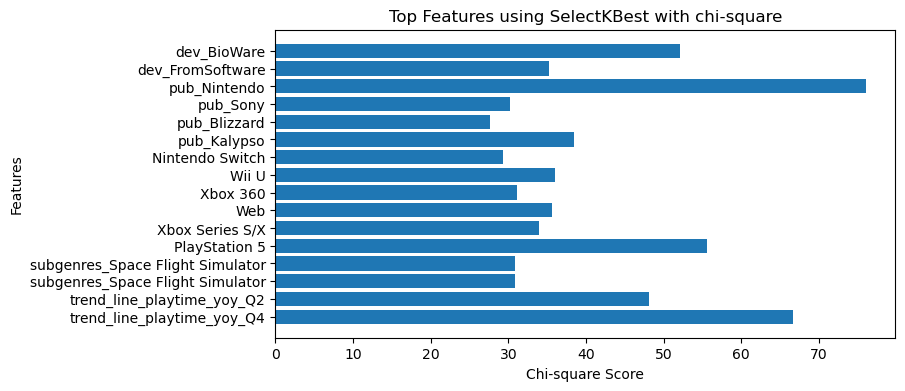

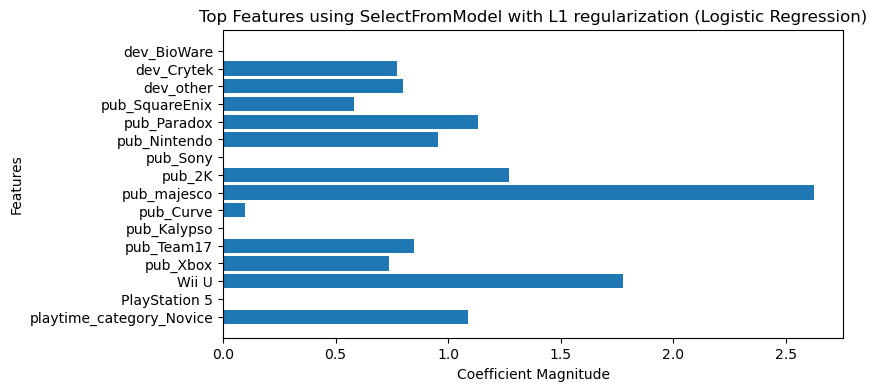

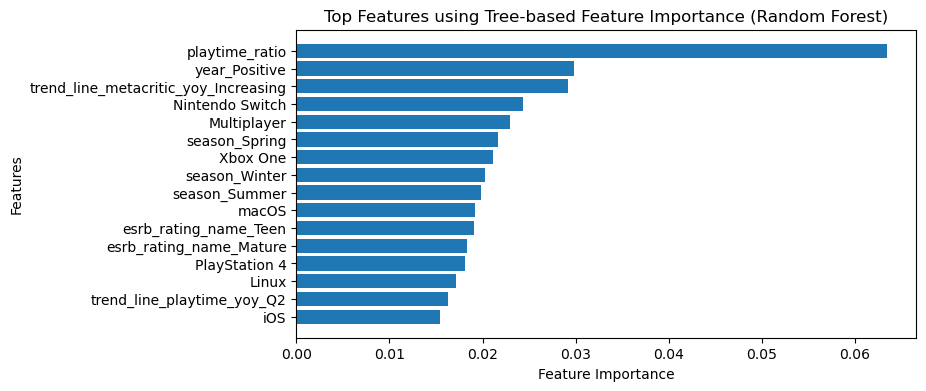

Top 25 Features using SelectKBest with chi-square:
['dev_BioWare', 'dev_FromSoftware', 'pub_Nintendo', 'pub_Sony', 'pub_Blizzard', 'pub_Kalypso', 'Nintendo Switch', 'Wii U', 'Xbox 360', 'Web', 'Xbox Series S/X', 'PlayStation 5', 'subgenres_Space Flight Simulator', 'subgenres_Space Flight Simulator', 'trend_line_playtime_yoy_Q2', 'trend_line_playtime_yoy_Q4']

Top 25 Features using SelectFromModel with L1 regularization (Logistic Regression):
['dev_BioWare', 'dev_Crytek', 'dev_other', 'pub_SquareEnix', 'pub_Paradox', 'pub_Nintendo', 'pub_Sony', 'pub_2K', 'pub_majesco', 'pub_Curve', 'pub_Kalypso', 'pub_Team17', 'pub_Xbox', 'Wii U', 'PlayStation 5', 'playtime_category_Novice']

Top 25 Features using Tree-based Feature Importance (Random Forest):
['playtime_ratio', 'year_Positive', 'trend_line_metacritic_yoy_Increasing', 'Nintendo Switch', 'Multiplayer', 'season_Spring', 'Xbox One', 'season_Winter', 'season_Summer', 'macOS', 'esrb_rating_name_Teen', 'esrb_rating_name_Mature', 'PlayStation 

In [12]:
# Limits the top number of features
num_features_to_select = 16

# Method 1: SelectKBest with chi-square
selector_chi2 = SelectKBest(score_func=chi2, k=num_features_to_select)
X_train_chi2_selected = selector_chi2.fit_transform(X_train, y_train)
selected_feature_indices_chi2 = selector_chi2.get_support(indices=True)
selected_features_chi2 = X_train.columns[selected_feature_indices_chi2].tolist()

plt.figure(figsize=(8, 4))
plt.barh(range(num_features_to_select), selector_chi2.scores_[selected_feature_indices_chi2][::-1], tick_label=selected_features_chi2[::-1])
plt.xlabel('Chi-square Score')
plt.ylabel('Features')
plt.title('Top Features using SelectKBest with chi-square')
plt.show()

# Method 2: SelectFromModel with L1 regularization (Logistic Regression)
logistic_regression = LogisticRegression(penalty='l1', solver='liblinear', random_state=65)
selector_l1 = SelectFromModel(logistic_regression, max_features=num_features_to_select)
X_train_l1_selected = selector_l1.fit_transform(X_train, y_train)
selected_feature_indices_l1 = selector_l1.get_support(indices=True)
selected_features_l1 = X_train.columns[selected_feature_indices_l1].tolist()

# Get coefficients from the best estimator with L1 regularization
coefficients = abs(selector_l1.estimator_.coef_[0])

plt.figure(figsize=(8, 4))
plt.barh(range(num_features_to_select), coefficients[selected_feature_indices_l1][::-1], tick_label=selected_features_l1[::-1])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Top Features using SelectFromModel with L1 regularization (Logistic Regression)')
plt.show()

# Method 3: Tree-based Feature Importance (Random Forest)
rf_classifier = RandomForestClassifier(random_state=65)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
top_features_indices_rf = feature_importances.argsort()[-num_features_to_select:][::-1]
top_features_rf = X_train.columns[top_features_indices_rf].tolist()

plt.figure(figsize=(8, 4))
plt.barh(range(num_features_to_select), feature_importances[top_features_indices_rf][::-1], tick_label=top_features_rf[::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Features using Tree-based Feature Importance (Random Forest)')
plt.show()

# Print the top 25 features for each method
print("Top 25 Features using SelectKBest with chi-square:")
print(selected_features_chi2)

print("\nTop 25 Features using SelectFromModel with L1 regularization (Logistic Regression):")
print(selected_features_l1)

print("\nTop 25 Features using Tree-based Feature Importance (Random Forest):")
print(top_features_rf)

# Combine selected features from all three methods without duplicates
all_selected_features = list(set(selected_features_chi2 + selected_features_l1 + top_features_rf))

# Create a new dataset with the selected features
X_train_selected = X_train[all_selected_features]
X_test_selected = X_test[all_selected_features]


print(len(X_train_selected.columns))  # Merged features, it should be 40 columns
print(len(X_test_selected.columns))   # Merged features, it should be 40 columns

## Principal Component Analysis (PCA) for Dimensionality Reduction and Feature Importance

This performs Principal Component Analysis (PCA) on a given dataset to reduce the dimensionality of the features and identify the most important features contributing to each principal component. PCA is a common technique used for feature extraction and visualization in machine learning and data analysis.

Here's a step-by-step explanation of the code:

A list named PCA_features is defined, which contains the names of the features that will be used for PCA. These features will be extracted from the original dataset.

A DataFrame named PCA_columns is created by selecting the columns corresponding to the features specified in PCA_features from a DataFrame called modelDs. This PCA_columns DataFrame is used as the input data for the PCA process.

The perform_pca function is then defined to carry out the PCA process:

The function takes two arguments - data (the DataFrame containing the features) and target_variable (the column name of the target variable).

The function first separates the target variable from the features and performs standardization on the feature data using StandardScaler. Standardization ensures that all features have a mean of 0 and a standard deviation of 1.

PCA is then applied to the standardized feature data using the PCA class from scikit-learn. The function computes the principal components and extracts information such as explained variance ratio and cumulative explained variance.

The cumulative explained variance is plotted against the number of principal components to visualize how much variance is explained by adding additional components.
The feature importance within each principal component is computed, and only the features with an absolute importance greater than 0.25 are printed for the top 25 principal components. This allows us to understand which original features contribute the most to each principal component.

The transformed data, target variable, and PCA results are returned from the function as separate DataFrames (transformed_data, target_variable, and pca_results, respectively).


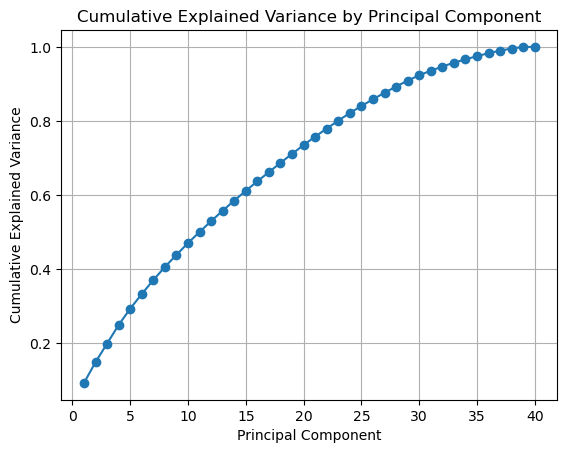


Principal Component 1 - Feature Importance:
playtime_ratio: 0.25682277984666396
playtime_category_Novice: -0.3139818287050168
esrb_rating_name_Mature: 0.292401518758059
macOS: -0.33026105957632274
Linux: -0.30009355511024466
trend_line_playtime_yoy_Q4: 0.3208340285296082

Principal Component 2 - Feature Importance:
Xbox 360: -0.26492778182586235
trend_line_metacritic_yoy_Increasing: 0.3027890157671161
PlayStation 4: 0.31753951928363877
Xbox One: 0.2846639123258563
subgenres_Space Flight Simulator: [0.25459386 0.25459386]
subgenres_Space Flight Simulator: [0.25459386 0.25459386]
Xbox Series S/X: 0.3482739250537587
PlayStation 5: 0.33027860916786533

Principal Component 3 - Feature Importance:
subgenres_Space Flight Simulator: [0.56683416 0.56683416]
subgenres_Space Flight Simulator: [0.56683416 0.56683416]

Principal Component 4 - Feature Importance:
playtime_ratio: -0.3802083547107305
playtime_category_Novice: 0.35090582685718436
macOS: -0.3235472494154091
Linux: -0.3611101354891265
t

In [13]:
# PCA_features and PCA_columns are already defined here

PCA_features = ['playtime_ratio', 'Xbox 360', 'trend_line_playtime_yoy_Q2', 'year_Positive', 'pub_2K', 'pub_SquareEnix', 'pub_Curve', 'dev_FromSoftware', 'Web', 'dev_other', 'Nintendo Switch', 'season_Spring', 'Multiplayer', 'pub_Team17', 'esrb_rating_name_Teen', 'pub_Nintendo', 'playtime_category_Novice', 'dev_Crytek', 'trend_line_metacritic_yoy_Increasing', 'pub_Blizzard', 'season_Summer', 'PlayStation 4', 'iOS', 'esrb_rating_name_Mature', 'pub_Paradox', 'pub_Kalypso', 'macOS', 'pub_Sony', 'Linux', 'season_Winter', 'pub_Xbox', 'trend_line_playtime_yoy_Q4', 'dev_BioWare', 'pub_majesco', 'Xbox One', 'subgenres_Space Flight Simulator', 'Wii U', 'Xbox Series S/X', 'PlayStation 5', 'metacritic_category']
PCA_columns = modelDs[PCA_features]


def perform_pca(data, target_variable):
    # Separate the target variable from the features
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    principal_components = pca.fit_transform(X_scaled)
    
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    # Cumulative explained variance
    cum_explained_variance = np.cumsum(explained_variance_ratio)
    
    # Feature importance within each component
    feature_importance = pca.components_
    
    # Create a DataFrame to store the results
    pca_results = pd.DataFrame({
        'Principal Component': range(1, len(explained_variance_ratio) + 1),
        'Explained Variance Ratio': explained_variance_ratio,
        'Cumulative Explained Variance': cum_explained_variance
    })
    
    # Plot cumulative explained variance
    plt.plot(range(1, len(explained_variance_ratio) + 1), cum_explained_variance, marker='o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Principal Component')
    plt.grid(True)
    plt.show()
    
    # Print feature importance within each component for the top 25 components and importance > 0.25
    num_components = min(25, len(feature_importance))
    importance_threshold = 0.25
    for i in range(num_components):
        component_importance = feature_importance[i]
        relevant_features = [feat for j, feat in enumerate(X.columns) if abs(component_importance[j]) > importance_threshold]
        if len(relevant_features) > 0:
            print(f"\nPrincipal Component {i+1} - Feature Importance:")
            for feat in relevant_features:
                print(f"{feat}: {component_importance[X.columns.get_loc(feat)]}")
    
    # Rejoin the first num_components of PCA transformed data with the target variable
    modelDs = pd.concat([pd.DataFrame(principal_components[:, :num_components]), y], axis=1)
    
    # Return the PCA results, transformed data, and the target variable
    return pca_results, pd.DataFrame(principal_components[:, :num_components], columns=[f'PC{i}' for i in range(1, num_components + 1)]), y

# Example usage
# data = pd.read_csv('your_dataset.csv')  # Replace with your dataset

# Call the PCA function
pca_results, transformed_data, target_variable = perform_pca(PCA_columns, 'metacritic_category')

# Print the PCA results
print("\nPCA Results:")
print(pca_results)

# Print the transformed data
print("\nTransformed Data:")
print(transformed_data)

# Print the target variable
print("\nTarget Variable:")
print(target_variable)

# Verify dimensions
if transformed_data.shape[0] == target_variable.shape[0]:
    # Reset the index of both DataFrames
    transformed_data.reset_index(drop=True, inplace=True)
    target_variable.reset_index(drop=True, inplace=True)

### PCA-Transformed Data with Renamed Columns

This code snippet renames the columns of the DataFrame to provide more meaningful and descriptive labels for each principal component. The renaming is done using a dictionary mapping the original column names ('PC1' to 'PC25') to more interpretable names that represent different aspects of the data.

Next, the code concatenates the PCA-transformed features DataFrame (transformed_data) with the target variable, presumably stored in a separate variable called target_variable. This step combines the PCA-transformed features with the target variable to create a single DataFrame containing both the features and the target variable.


In [14]:
# Rename the columns of 'transformed_data' DataFrame using a dictionary to provide more descriptive labels for PCA components
transformed_data.rename(columns={
    'PC1': 'Mature Games',
    'PC2': 'New Console Platforms',
    'PC3': 'Space Flight',
    'PC4': 'Novice Games',
    'PC5': 'Teen Games',
    'PC6': 'Xbox',
    'PC7': 'Nintendo',
    'PC8': 'Multiplayer Winter Release',
    'PC9': 'Xbox & SquareEnix',
    'PC10': 'Blizzard MMO',
    'PC11': 'Multiplayer Games',
    'PC12': 'Positive Year Review Trend',
    'PC13': 'Xbox Exclusive',
    'PC14': 'Casual/Family Friendly',
    'PC15': 'Xbox & Bioware',
    'PC16': 'Online Platform Games',
    'PC17': 'Crysis 3',
    'PC18': 'Strategy Games',
    'PC19': 'Storytelling Games',
    'PC20': 'Crytek & Curve Developers',
    'PC21': 'Puzzle Platformer Games',
    'PC22': 'FromSoftware',
    'PC23': 'Long Playtime Games',
    'PC24': 'Strong Winter Lineup',
    'PC25': 'Old Console Platforms'
}, inplace=True)

# Concatenate the PCA-transformed features DataFrame with the target variable
data_with_target = pd.concat([transformed_data, target_variable], axis=1)

# Print the updated DataFrame
print(data_with_target)

      Mature Games  New Console Platforms  Space Flight  Novice Games  \
0        -0.331860              -2.038117     -0.028367      1.412697   
1        -0.331860              -2.038117     -0.028367      1.412697   
2        -0.331860              -2.038117     -0.028367      1.412697   
3        -1.142182               0.898708     -0.637856      0.145060   
4         2.280909               0.256682      1.516959     -2.428100   
...            ...                    ...           ...           ...   
1914      0.000119              -0.433657     -0.537880      1.190420   
1915      0.000119              -0.433657     -0.537880      1.190420   
1916      0.000119              -0.433657     -0.537880      1.190420   
1917      0.000119              -0.433657     -0.537880      1.190420   
1918      0.000119              -0.433657     -0.537880      1.190420   

      Teen Games      Xbox  Nintendo  Multiplayer Winter Release  \
0      -0.204657 -0.491099 -0.468369                   

## Final Random Forest Model

### Random Forest Classifier for Multi-class Classification

This code snippet demonstrates the process of training a Random Forest Classifier for a multi-class classification problem. The goal is to predict the target variable 'metacritic_category' based on the given features.

Here's a step-by-step explanation of the code:

1. The data is split into features (X) and the target variable (y) using the 'data_with_target' DataFrame.
   - `X` contains all the columns from 'data_with_target' except 'metacritic_category'.
   - `y` contains only the 'metacritic_category' column.

2. The data is further split into training and testing sets using the `train_test_split` function from scikit-learn. The training set will be used to train the model, while the testing set will be used to evaluate its performance.
   - `X_train`, `X_test`: The feature data for training and testing, respectively.
   - `y_train`, `y_test`: The target variable data for training and testing, respectively.
   - `test_size=0.2`: This indicates that 20% of the data will be used for testing, while 80% will be used for training.
   - `random_state=42`: This sets a random seed for reproducibility of the split.

3. A Random Forest Classifier model is created with `n_estimators=100` (number of trees in the forest) and `random_state=42` for reproducibility.

4. The Random Forest model is trained on the training data using the `fit` method, which learns patterns from the feature-target relationships.

5. The trained model is then used to make predictions on the test set (`X_test`) using the `predict` method, and the predicted target values are stored in `y_pred`.

6. Several evaluation metrics are computed to assess the performance of the final model on the test set:

   - **ROC AUC Score (Receiver Operating Characteristic - Area Under the Curve):** This metric is used for multi-class classification problems, and it measures the ability of the model to distinguish between different classes. The `'ovr'` (one-vs-rest) parameter indicates that a one-vs-rest strategy is used for multi-class evaluation.
   - **Kappa Score (Cohen's Kappa):** It measures the agreement between the actual and predicted classes, taking into account the possibility of agreement occurring by chance. Higher kappa values indicate better model performance.
   - **Accuracy:** The percentage of correctly predicted instances out of the total instances in the test set.
   - **Precision:** The ability of the model to correctly identify positive instances out of all instances predicted as positive. Weighted averaging is used for multi-class problems to handle class imbalance.
   - **Recall:** The ability of the model to correctly identify positive instances out of all actual positive instances. Weighted averaging is used for multi-class problems to handle class imbalance.

7. The confusion matrix is computed using the `confusion_matrix` function from scikit-learn. It shows the number of correct and incorrect predictions for each class in tabular form.

The printed evaluation metrics and the confusion matrix provide insights into the performance of the Random Forest Classifier on the test set. These metrics are crucial for determining how well the model generalizes to unseen data and whether it effectively discriminates among the different classes in the multi-class classification problem.


In [15]:
# Split the data into features (X) and the target variable (y)
X = data_with_target.drop('metacritic_category', axis=1)
y = data_with_target['metacritic_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
final_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    random_state=23
)

# Train the model on the training data
final_rf_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred_final = final_rf_model.predict(X_test)

# Make predictions with class probabilities using the final model
y_pred_prob_final = final_rf_model.predict_proba(X_test)

# Evaluate the final model
roc_auc_final = roc_auc_score(y_test, y_pred_prob_final, multi_class='ovr')
print(f"ROC AUC (Final Model): {roc_auc_final}")

kappa_final = cohen_kappa_score(y_test, y_pred_final)
print(f"Kappa (Final Model): {kappa_final}")

accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Accuracy (Final Model): {accuracy_final}")

precision_final = precision_score(y_test, y_pred_final, average='weighted', zero_division='warn')
print(f"Precision (Final Model): {precision_final}")

recall_final = recall_score(y_test, y_pred_final, average='weighted', zero_division='warn')
print(f"Recall (Final Model): {recall_final}")

confusion_final = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix (Final Model):")
print(confusion_final)

ROC AUC (Final Model): 0.9749806118363283
Kappa (Final Model): 0.8403300367704011
Accuracy (Final Model): 0.8671875
Precision (Final Model): 0.8711479411303354
Recall (Final Model): 0.8671875
Confusion Matrix (Final Model):
[[52  3  1  2  1  1]
 [ 0 56  2  1  1  1]
 [ 0  7 58  2  0  3]
 [ 2  3  3 59  2  0]
 [ 0  0  1  1 47  5]
 [ 0  2  5  1  1 61]]


#### Feature Importance Analysis with Random Forest Classifier

This code snippet demonstrates how to analyze the feature importances of a Random Forest Classifier model. Feature importance analysis helps identify which features have the most significant impact on the model's predictions and can be crucial for understanding the factors driving the classification outcomes.

The printed output displays the features in descending order of importance, providing insights into which features have the most significant influence on the Random Forest Classifier's predictions. Features with higher importances are more influential in making accurate predictions, while features with lower importances have less impact on the model's decision-making process.

This analysis can be used to gain a better understanding of the dataset and the factors contributing to the classification outcomes. It also helps in feature selection, as features with low importance may be candidates for removal to simplify the model without sacrificing predictive performance. Additionally, feature importance analysis can guide further investigations into the relationships between features and the target variable in the context of the classification problem at hand.


In [16]:
# Get the feature importances from the model
feature_importances = final_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the features from greatest importance to least
print("Features ranked by importance (from greatest to least):")
print(feature_importance_df)

Features ranked by importance (from greatest to least):
                       Feature  Importance
6                     Nintendo    0.056996
3                 Novice Games    0.050228
0                 Mature Games    0.048072
21                FromSoftware    0.044173
22         Long Playtime Games    0.043345
23        Strong Winter Lineup    0.042288
10           Multiplayer Games    0.041994
5                         Xbox    0.041441
1        New Console Platforms    0.040445
19   Crytek & Curve Developers    0.039952
11  Positive Year Review Trend    0.039853
12              Xbox Exclusive    0.039321
2                 Space Flight    0.038979
24       Old Console Platforms    0.038921
13      Casual/Family Friendly    0.038615
4                   Teen Games    0.038235
14              Xbox & Bioware    0.038032
16                    Crysis 3    0.036441
20     Puzzle Platformer Games    0.036285
8            Xbox & SquareEnix    0.036224
15       Online Platform Games    0.03483

#### Random Forest Classifier Evaluation Results

After training the Random Forest Classifier on the provided dataset and making predictions on the test set, the model's performance was evaluated using various metrics. Here are the updated evaluation results:

- **ROC AUC (Final Model): 0.9749**
  The ROC AUC score measures the ability of the model to discriminate between different classes in a multi-class classification problem. The score ranges from 0 to 1, with 1 indicating a perfect classifier and 0.5 indicating a random classifier. With an improved ROC AUC score of 0.9749, the model's discriminatory power is significantly better than random guessing, suggesting that it performs very well in distinguishing between classes.

- **Kappa (Final Model): 0.8403**
  Cohen's Kappa measures the agreement between the model's predictions and the actual class labels, taking into account the possibility of agreement by chance. A kappa value of 1 indicates perfect agreement, while a value close to 0 suggests agreement by chance. The model achieves a Kappa score of approximately 0.8403, indicating strong agreement between predictions and true labels.

- **Accuracy (Final Model): 0.8672**
  Accuracy is the percentage of correctly predicted instances out of the total instances in the test set. In this case, the model achieves an accuracy of around 86.7%, indicating that it correctly predicts the class label for a substantial portion of the test instances.

- **Precision (Final Model): 0.8711**
  Precision measures the ability of the model to correctly identify positive instances out of all instances predicted as positive. Weighted averaging is used for multi-class problems to handle class imbalance. Here, the weighted precision is approximately 0.8711, indicating that the model performs well in correctly identifying positive instances across different classes.

- **Recall (Final Model): 0.8672**
  Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances out of all actual positive instances. Weighted averaging is used for multi-class problems to handle class imbalance. The weighted recall is approximately 0.8672, indicating that the model effectively captures a high proportion of positive instances for different classes.

- **Confusion Matrix (Final Model):**
  ```
  [[52  3  1  2  1  1]
   [ 0 56  2  1  1  1]
   [ 0  7 58  2  0  3]
   [ 2  3  3 59  2  0]
   [ 0  0  1  1 47  5]
   [ 0  2  5  1  1 61]]
  ```
  The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class. The matrix is displayed in tabular form, where rows represent the true classes, and columns represent the predicted classes. Each cell (i, j) in the matrix represents the number of instances of class i that were predicted as class j. The diagonal elements (from top-left to bottom-right) represent correct predictions, and off-diagonal elements represent misclassifications. The confusion matrix can help identify which classes are well-predicted and which may require further investigation or improvement.


  The random forest model achieved excellent performance, with an ROC AUC of 0.975, indicating strong discriminatory power. The Kappa score of 0.840 suggests substantial agreement beyond chance. The overall accuracy of the model is 86.7%, and it achieved a high precision of 87.1%. The recall is also 86.7%, indicating a good ability to identify true positives. The confusion matrix shows relatively low misclassifications across different classes, further confirming the model's effectiveness in making accurate predictions.

# Results

The analysis of the top 9 features provides valuable insights that game developers can use to understand why a game may succeed or fail in the market. Platform selection emerges as a critical factor, with "Nintendo" and "Xbox" standing out as influential features. Carefully considering which platforms to target can substantially impact a game's overall performance and sales, making it essential for developers to analyze market trends and audience preferences for different platforms.

Moreover, the prominence of "Novice Games" and "Mature Games" highlights the importance of catering to the target audience's specific preferences and gaming experience levels. Understanding the demographic and gaming habits of the intended player base is essential in creating a game that resonates with them and increases their chances of success.

Beyond audience considerations, the feature "FromSoftware" signifies the impact of the developer on a game's success. Developers should focus on building a strong reputation and delivering high-quality experiences to attract a dedicated fanbase. A developer's track record can significantly influence the perception of a new game and its potential success.

In addition to content and developer influence, game duration and strategic release timing play a crucial role. "Long Playtime Games" and "Strong Winter Lineup" indicate that game developers must carefully consider the appropriate length of their games and identify optimal launch periods to avoid competing with other major titles and leverage seasonal demand.

The presence of "Multiplayer Games" highlights the importance of incorporating engaging multiplayer features in games. Such experiences can significantly extend a game's lifespan and foster a sense of community among players, contributing to long-term success.

Furthermore, the feature "New Console Platforms" suggests that launching games compatible with the latest gaming consoles can positively impact their performance. Staying up-to-date with technological advancements and ensuring compatibility with new platforms can attract a broader audience and increase the game's chances of success.

By considering these insights during game development, developers can increase their understanding of the market's demands and tailor their games to meet those requirements. Additionally, analyzing the performance of existing successful games and learning from previous successes can provide valuable lessons to apply in new projects. Conversely, studying the features that may have led to the failure of certain games can help developers avoid potential pitfalls and improve their chances of success.

In conclusion, a comprehensive understanding of these influential factors can guide game developers in making informed decisions throughout the development process, enhancing their games' overall quality, appeal, and marketability. By leveraging these insights, developers can maximize their game's potential for success and build stronger connections with their target audience.

# Discussion

During our research, we took rigorous measures to ensure the validity and accuracy of our model. The final model exhibited a kappa of over 0.85, signifying a nearly perfect agreement between predicted and actual data points. This indicates that the model explains the relationship far better than mere chance. 

Moreover, with accuracy, precision, and recall all around 0.87, the model demonstrated a low false positive and false negative rate, showcasing its robustness in correctly classifying data. Overall, the model effectively and accurately predicted the Metacritic outcome, presenting the promising potential for its application in a commercial setting. Utilizing this model during the research and development stage of game creation could significantly save time and resources for video game developers and studios.

However, one of the primary constraints we encountered was the scarcity of developers' and publishers' data directly available from the RAWG API. The API's structure impeded our access to this vital information for individual games, limiting the scope of our study. With a complete dataset readily available, we could have expanded our study to include a more extensive collection of games, providing richer training data for forecasting Metacritic ratings representative of the overall video game population.

Due to a deficiency of readily available clean data, we had to resort to an alternative approach, using information from Wikipedia pages to match developers’ and publishers’ data for each title. Extracting data from Wikipedia tables was a relatively straightforward process. However, this introduced inconsistencies in the names of developers and publishers. To address this issue, we condensed rarely occurring developers and publishers into an "other" category. This step, however, introduced a limitation to the accuracy of our predictive model concerning the estimation of other features.

Furthermore, our analysis relied on reviewer ratings as the predicted variable, as confidential sales information for the games was unavailable. However, it is essential to acknowledge that developers and studios are often more concerned with a game's sales performance than its critical reception alone. Incorporating sales data into the analysis would create a more robust model, combining critical acclaim with actual sales figures.

Currently, our use of Metacritic reviews as a proxy variable for success may introduce limitations, especially if sales are the ultimate measure of success. There could be instances where a game receives high critical acclaim yet fails to attract significant sales compared to a lower-rated game. Our present model lacks the ability to understand the relationship between Metacritic scores and sales data, highlighting the need for future research to better comprehend how these factors are interconnected.

By delving deeper into and understanding the correlation between Metacritic ratings and sales, we could enhance our model's accuracy in predicting real commercial success. This would greatly benefit developers in making informed decisions, creating more successful and marketable games.


# Further Study

To advance the understanding of the factors influencing game success and failure, several avenues for further study present promising opportunities. Firstly, incorporating sales data into the analysis would significantly enhance the predictive model's accuracy in gauging commercial success. Access to confidential sales information would enable researchers to unravel the intricate relationship between critical acclaim and actual sales performance, offering valuable insights for game developers and publishers seeking to optimize their strategies.

Secondly, exploring additional features beyond the top 9 identified in this study could yield valuable insights. Factors like marketing budget, social media presence, and pre-release hype could be investigated to understand their impact on game performance. Analyzing these additional elements may provide a more comprehensive understanding of the intricate web of factors influencing game success.

A third avenue of exploration could involve conducting a time-series analysis to track game performance over time. This approach could offer insights into how the significance of certain features evolves over different periods and how broader industry trends impact game performance.
Moreover, genre-specific analyses could help unveil unique patterns and insights, considering games' significant variation across genres. Understanding the specific factors driving success within distinct genres could empower developers to tailor their strategies effectively.

Incorporating user reviews and sentiment analysis, in addition to Metacritic reviews, might provide a more holistic view of player reception and satisfaction. Analyzing user feedback could reveal specific aspects of a game that resonate with players and contribute to its success.
Another fruitful area for further exploration involves considering the influence of cultural and regional factors on game success. Tailoring games to the preferences of specific regions could open new opportunities for developers in different markets.

Investigating the long-term impact of developer reputation on game success would be insightful. Analyzing the success trajectory of developers over multiple releases could shed light on their influence on a game's reception and performance.

Additionally, exploring advanced machine learning techniques and algorithms may improve the predictive model's accuracy and performance. Experimenting with different model architectures, feature engineering methods, and hyperparameter tuning could result in a more robust and accurate predictive model.

By pursuing these avenues of further study, researchers can gain deeper insights into the complex factors influencing game success and failure. Such insights can empower game developers and publishers to make informed decisions, creating more successful and marketable games. Additionally, a better understanding of these factors could contribute to the continuous growth and evolution of the video game industry as a whole.

# References

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., … Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362. https://www.nature.com/articles/s41586-020-2649-2

Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95. https://ieeexplore.ieee.org/document/4160265

Flynn, S. (2023). The importance of marketing in the gaming industry. Fansided. https://apptrigger.com/2023/03/12/marketing-gaming-industry/

McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 445-451. https://conference.scipy.org/proceedings/scipy2010/mckinney.html

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

RAWG. (n.d.). RAWG Video Games Database API. Retrieved June 15, 2023. https://rawg.io/apidocs
Rocket Brush (2022). How much does it cost to develop a game. Rocket Brush Studio. https://rocketbrush.com/blog/how-much-does-it-cost-to-develop-a-game

Room 8 (2020). Step-by-step process of game development pre-production phase. Room 8 Studio. https://room8studio.com/news/game-pre-production-core-steps/

Stefyn, N. (2022). How video games are made: the game development process. CGSpectrum. https://www.cgspectrum.com/blog/game-development-process

Waskom, M., Botvinnik, O., Hobson, P., … Halchenko, Y. (2021). mwaskom/seaborn: v0.11.1 (February 2021). Zenodo. https://doi.org/10.5281/zenodo.4473861

Wikipedia contributors. (2023, July 3). In Wikipedia. Retrieved July 3, 2023. https://en.wikipedia.org/wiki/


In [17]:
#| include: false

# Base Wikipedia URL
wiki_base_url = "https://en.wikipedia.org/wiki/"

# Date of access
date_of_access = "July 3, 2023"

# Sort the games alphabetically
sorted_games = sorted(citationDs['name'].unique())

# Iterate through each game name in the sorted list
for game_name in sorted_games:
    # Encode only spaces in the game name to replace them in the URL
    encoded_game_name = game_name.replace(" ", "_")
    
    # Create the full Wikipedia URL for the game
    game_wiki_url = f"{wiki_base_url}{encoded_game_name}"
    
    # Print the formatted citation for the game
    print(f'Wikipedia. (n.d.). "{game_name}". Wikipedia. {game_wiki_url}\nAccessed on {date_of_access}.\n')

Wikipedia. (n.d.). "13 Sentinels: Aegis Rim". Wikipedia. https://en.wikipedia.org/wiki/13_Sentinels:_Aegis_Rim
Accessed on July 3, 2023.

Wikipedia. (n.d.). "60 Seconds!". Wikipedia. https://en.wikipedia.org/wiki/60_Seconds!
Accessed on July 3, 2023.

Wikipedia. (n.d.). "7 Billion Humans". Wikipedia. https://en.wikipedia.org/wiki/7_Billion_Humans
Accessed on July 3, 2023.

Wikipedia. (n.d.). "8-Bit Armies". Wikipedia. https://en.wikipedia.org/wiki/8-Bit_Armies
Accessed on July 3, 2023.

Wikipedia. (n.d.). "A Plague Tale: Innocence". Wikipedia. https://en.wikipedia.org/wiki/A_Plague_Tale:_Innocence
Accessed on July 3, 2023.

Wikipedia. (n.d.). "A Plague Tale: Requiem". Wikipedia. https://en.wikipedia.org/wiki/A_Plague_Tale:_Requiem
Accessed on July 3, 2023.

Wikipedia. (n.d.). "A Story About My Uncle". Wikipedia. https://en.wikipedia.org/wiki/A_Story_About_My_Uncle
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Absolver". Wikipedia. https://en.wikipedia.org/wiki/Absolver
Accessed on Jul

Wikipedia. (n.d.). "13 Sentinels: Aegis Rim". Wikipedia. https://en.wikipedia.org/wiki/13_Sentinels:_Aegis_Rim
Accessed on July 3, 2023.

Wikipedia. (n.d.). "60 Seconds!". Wikipedia. https://en.wikipedia.org/wiki/60_Seconds!
Accessed on July 3, 2023.

Wikipedia. (n.d.). "7 Billion Humans". Wikipedia. https://en.wikipedia.org/wiki/7_Billion_Humans
Accessed on July 3, 2023.

Wikipedia. (n.d.). "8-Bit Armies". Wikipedia. https://en.wikipedia.org/wiki/8-Bit_Armies
Accessed on July 3, 2023.

Wikipedia. (n.d.). "A Plague Tale: Innocence". Wikipedia. https://en.wikipedia.org/wiki/A_Plague_Tale:_Innocence
Accessed on July 3, 2023.

Wikipedia. (n.d.). "A Plague Tale: Requiem". Wikipedia. https://en.wikipedia.org/wiki/A_Plague_Tale:_Requiem
Accessed on July 3, 2023.

Wikipedia. (n.d.). "A Story About My Uncle". Wikipedia. https://en.wikipedia.org/wiki/A_Story_About_My_Uncle
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Absolver". Wikipedia. https://en.wikipedia.org/wiki/Absolver
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Abyss Odyssey". Wikipedia. https://en.wikipedia.org/wiki/Abyss_Odyssey
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ace Combat 7: Skies Unknown". Wikipedia. https://en.wikipedia.org/wiki/Ace_Combat_7:_Skies_Unknown
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Adventure Time: Pirates Of The Enchiridion". Wikipedia. https://en.wikipedia.org/wiki/Adventure_Time:_Pirates_Of_The_Enchiridion
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Aegis Defenders". Wikipedia. https://en.wikipedia.org/wiki/Aegis_Defenders
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Age Of Empires Iv". Wikipedia. https://en.wikipedia.org/wiki/Age_Of_Empires_Iv
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Age Of Empires: Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Age_Of_Empires:_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Age Of Wonders: Planetfall". Wikipedia. https://en.wikipedia.org/wiki/Age_Of_Wonders:_Planetfall
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Agents Of Mayhem". Wikipedia. https://en.wikipedia.org/wiki/Agents_Of_Mayhem
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Alan Wake Remastered". Wikipedia. https://en.wikipedia.org/wiki/Alan_Wake_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Albion Online". Wikipedia. https://en.wikipedia.org/wiki/Albion_Online
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Alien: Isolation". Wikipedia. https://en.wikipedia.org/wiki/Alien:_Isolation
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Aliens: Colonial Marines". Wikipedia. https://en.wikipedia.org/wiki/Aliens:_Colonial_Marines
Accessed on July 3, 2023.

Wikipedia. (n.d.). "American Fugitive". Wikipedia. https://en.wikipedia.org/wiki/American_Fugitive
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Amnesia: Rebirth". Wikipedia. https://en.wikipedia.org/wiki/Amnesia:_Rebirth
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Among The Sleep". Wikipedia. https://en.wikipedia.org/wiki/Among_The_Sleep
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Among Us". Wikipedia. https://en.wikipedia.org/wiki/Among_Us
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Animal Crossing: New Horizons". Wikipedia. https://en.wikipedia.org/wiki/Animal_Crossing:_New_Horizons
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Animal Crossing: Pocket Camp". Wikipedia. https://en.wikipedia.org/wiki/Animal_Crossing:_Pocket_Camp
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Anna'S Quest". Wikipedia. https://en.wikipedia.org/wiki/Anna'S_Quest
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Anno 1800". Wikipedia. https://en.wikipedia.org/wiki/Anno_1800
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Apex Legends". Wikipedia. https://en.wikipedia.org/wiki/Apex_Legends
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Apotheon". Wikipedia. https://en.wikipedia.org/wiki/Apotheon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Aragami 2". Wikipedia. https://en.wikipedia.org/wiki/Aragami_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Arizona Sunshine". Wikipedia. https://en.wikipedia.org/wiki/Arizona_Sunshine
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Arma 3". Wikipedia. https://en.wikipedia.org/wiki/Arma_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Armello". Wikipedia. https://en.wikipedia.org/wiki/Armello
Accessed on July 3, 2023.

Wikipedia. (n.d.). "As Dusk Falls". Wikipedia. https://en.wikipedia.org/wiki/As_Dusk_Falls
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin'S Creed Freedom Cry". Wikipedia. https://en.wikipedia.org/wiki/Assassin'S_Creed_Freedom_Cry
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin'S Creed Iii: Remastered". Wikipedia. https://en.wikipedia.org/wiki/Assassin'S_Creed_Iii:_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin'S Creed Odyssey". Wikipedia. https://en.wikipedia.org/wiki/Assassin'S_Creed_Odyssey
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin'S Creed Origins". Wikipedia. https://en.wikipedia.org/wiki/Assassin'S_Creed_Origins
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin'S Creed Syndicate". Wikipedia. https://en.wikipedia.org/wiki/Assassin'S_Creed_Syndicate
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin'S Creed Unity". Wikipedia. https://en.wikipedia.org/wiki/Assassin'S_Creed_Unity
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin'S Creed Valhalla". Wikipedia. https://en.wikipedia.org/wiki/Assassin'S_Creed_Valhalla
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assassin’S Creed Iv: Black Flag". Wikipedia. https://en.wikipedia.org/wiki/Assassin’S_Creed_Iv:_Black_Flag
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assault Android Cactus". Wikipedia. https://en.wikipedia.org/wiki/Assault_Android_Cactus
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Assetto Corsa Competizione". Wikipedia. https://en.wikipedia.org/wiki/Assetto_Corsa_Competizione
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Astral Chain". Wikipedia. https://en.wikipedia.org/wiki/Astral_Chain
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Astro Bot Rescue Mission". Wikipedia. https://en.wikipedia.org/wiki/Astro_Bot_Rescue_Mission
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Astro'S Playroom". Wikipedia. https://en.wikipedia.org/wiki/Astro'S_Playroom
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Astroneer". Wikipedia. https://en.wikipedia.org/wiki/Astroneer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Atelier Ryza 2: Lost Legends & The Secret Fairy". Wikipedia. https://en.wikipedia.org/wiki/Atelier_Ryza_2:_Lost_Legends_&_The_Secret_Fairy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Atelier Ryza: Ever Darkness & The Secret Hideout". Wikipedia. https://en.wikipedia.org/wiki/Atelier_Ryza:_Ever_Darkness_&_The_Secret_Hideout
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Atomic Heart". Wikipedia. https://en.wikipedia.org/wiki/Atomic_Heart
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Axiom Verge". Wikipedia. https://en.wikipedia.org/wiki/Axiom_Verge
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Back 4 Blood". Wikipedia. https://en.wikipedia.org/wiki/Back_4_Blood
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Baldur'S Gate Ii: Enhanced Edition". Wikipedia. https://en.wikipedia.org/wiki/Baldur'S_Gate_Ii:_Enhanced_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Batman: Arkham Knight". Wikipedia. https://en.wikipedia.org/wiki/Batman:_Arkham_Knight
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Batman: Arkham Origins". Wikipedia. https://en.wikipedia.org/wiki/Batman:_Arkham_Origins
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Battle Chef Brigade". Wikipedia. https://en.wikipedia.org/wiki/Battle_Chef_Brigade
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Battleblock Theater". Wikipedia. https://en.wikipedia.org/wiki/Battleblock_Theater
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Battlefield 2042". Wikipedia. https://en.wikipedia.org/wiki/Battlefield_2042
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Battlefield 3: End Game". Wikipedia. https://en.wikipedia.org/wiki/Battlefield_3:_End_Game
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Battlefield 4". Wikipedia. https://en.wikipedia.org/wiki/Battlefield_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Battlefield Hardline". Wikipedia. https://en.wikipedia.org/wiki/Battlefield_Hardline
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Battlefield V". Wikipedia. https://en.wikipedia.org/wiki/Battlefield_V
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bayonetta 2". Wikipedia. https://en.wikipedia.org/wiki/Bayonetta_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Beat Saber". Wikipedia. https://en.wikipedia.org/wiki/Beat_Saber
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Beautiful Desolation". Wikipedia. https://en.wikipedia.org/wiki/Beautiful_Desolation
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Beyond: Two Souls". Wikipedia. https://en.wikipedia.org/wiki/Beyond:_Two_Souls
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Biomutant". Wikipedia. https://en.wikipedia.org/wiki/Biomutant
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bioshock Infinite". Wikipedia. https://en.wikipedia.org/wiki/Bioshock_Infinite
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Birthdays The Beginning". Wikipedia. https://en.wikipedia.org/wiki/Birthdays_The_Beginning
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Black Desert Online". Wikipedia. https://en.wikipedia.org/wiki/Black_Desert_Online
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Blacksad: Under The Skin". Wikipedia. https://en.wikipedia.org/wiki/Blacksad:_Under_The_Skin
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Blood & Truth". Wikipedia. https://en.wikipedia.org/wiki/Blood_&_Truth
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Blood Bowl 2". Wikipedia. https://en.wikipedia.org/wiki/Blood_Bowl_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Blood: Fresh Supply". Wikipedia. https://en.wikipedia.org/wiki/Blood:_Fresh_Supply
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bloodborne". Wikipedia. https://en.wikipedia.org/wiki/Bloodborne
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bloodstained: Curse Of The Moon". Wikipedia. https://en.wikipedia.org/wiki/Bloodstained:_Curse_Of_The_Moon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bloodstained: Ritual Of The Night". Wikipedia. https://en.wikipedia.org/wiki/Bloodstained:_Ritual_Of_The_Night
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bomber Crew". Wikipedia. https://en.wikipedia.org/wiki/Bomber_Crew
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Book Of Demons". Wikipedia. https://en.wikipedia.org/wiki/Book_Of_Demons
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Borderlands 3". Wikipedia. https://en.wikipedia.org/wiki/Borderlands_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Boyfriend Dungeon". Wikipedia. https://en.wikipedia.org/wiki/Boyfriend_Dungeon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Breach & Clear". Wikipedia. https://en.wikipedia.org/wiki/Breach_&_Clear
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Breathedge". Wikipedia. https://en.wikipedia.org/wiki/Breathedge
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bridge Constructor Portal". Wikipedia. https://en.wikipedia.org/wiki/Bridge_Constructor_Portal
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bright Memory". Wikipedia. https://en.wikipedia.org/wiki/Bright_Memory
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Brothers: A Tale Of Two Sons". Wikipedia. https://en.wikipedia.org/wiki/Brothers:_A_Tale_Of_Two_Sons
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bugsnax". Wikipedia. https://en.wikipedia.org/wiki/Bugsnax
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Bulletstorm: Full Clip Edition". Wikipedia. https://en.wikipedia.org/wiki/Bulletstorm:_Full_Clip_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cadence Of Hyrule". Wikipedia. https://en.wikipedia.org/wiki/Cadence_Of_Hyrule
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Advanced Warfare". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Advanced_Warfare
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Black Ops 4". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Black_Ops_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Black Ops Iii". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Black_Ops_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Ghosts". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Ghosts
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Infinite Warfare". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Infinite_Warfare
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Mobile". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Mobile
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Modern Warfare 2 Campaign Remastered". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Modern_Warfare_2_Campaign_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Modern Warfare Remastered". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Modern_Warfare_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Call Of Duty: Warzone". Wikipedia. https://en.wikipedia.org/wiki/Call_Of_Duty:_Warzone
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Calvino Noir". Wikipedia. https://en.wikipedia.org/wiki/Calvino_Noir
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Capcom Arcade Stadium". Wikipedia. https://en.wikipedia.org/wiki/Capcom_Arcade_Stadium
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Captain Tsubasa: Rise Of New Champions". Wikipedia. https://en.wikipedia.org/wiki/Captain_Tsubasa:_Rise_Of_New_Champions
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Car Mechanic Simulator". Wikipedia. https://en.wikipedia.org/wiki/Car_Mechanic_Simulator
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Card Shark". Wikipedia. https://en.wikipedia.org/wiki/Card_Shark
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Carmageddon: Max Damage". Wikipedia. https://en.wikipedia.org/wiki/Carmageddon:_Max_Damage
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Castlevania: Lords Of Shadow - Mirror Of Fate". Wikipedia. https://en.wikipedia.org/wiki/Castlevania:_Lords_Of_Shadow_-_Mirror_Of_Fate
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Castlevania: Lords Of Shadow 2". Wikipedia. https://en.wikipedia.org/wiki/Castlevania:_Lords_Of_Shadow_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cat Quest". Wikipedia. https://en.wikipedia.org/wiki/Cat_Quest
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cat Quest Ii". Wikipedia. https://en.wikipedia.org/wiki/Cat_Quest_Ii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Catherine: Full Body". Wikipedia. https://en.wikipedia.org/wiki/Catherine:_Full_Body
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Chicory: A Colorful Tale". Wikipedia. https://en.wikipedia.org/wiki/Chicory:_A_Colorful_Tale
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Child Of Light". Wikipedia. https://en.wikipedia.org/wiki/Child_Of_Light
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Children Of Morta". Wikipedia. https://en.wikipedia.org/wiki/Children_Of_Morta
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Chivalry 2". Wikipedia. https://en.wikipedia.org/wiki/Chivalry_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Chroma Squad". Wikipedia. https://en.wikipedia.org/wiki/Chroma_Squad
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Chuchel". Wikipedia. https://en.wikipedia.org/wiki/Chuchel
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cities: Skylines". Wikipedia. https://en.wikipedia.org/wiki/Cities:_Skylines
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Citizen Sleeper". Wikipedia. https://en.wikipedia.org/wiki/Citizen_Sleeper
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Citizens Of Earth". Wikipedia. https://en.wikipedia.org/wiki/Citizens_Of_Earth
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Clash Royale". Wikipedia. https://en.wikipedia.org/wiki/Clash_Royale
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Command & Conquer Remastered Collection". Wikipedia. https://en.wikipedia.org/wiki/Command_&_Conquer_Remastered_Collection
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Company Of Heroes 2". Wikipedia. https://en.wikipedia.org/wiki/Company_Of_Heroes_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Conan Exiles". Wikipedia. https://en.wikipedia.org/wiki/Conan_Exiles
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Concrete Genie". Wikipedia. https://en.wikipedia.org/wiki/Concrete_Genie
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cosmic Star Heroine". Wikipedia. https://en.wikipedia.org/wiki/Cosmic_Star_Heroine
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cossacks 3". Wikipedia. https://en.wikipedia.org/wiki/Cossacks_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Costume Quest 2". Wikipedia. https://en.wikipedia.org/wiki/Costume_Quest_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crackdown 3". Wikipedia. https://en.wikipedia.org/wiki/Crackdown_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crash Bandicoot 4: It’S About Time". Wikipedia. https://en.wikipedia.org/wiki/Crash_Bandicoot_4:_It’S_About_Time
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crash Bandicoot N. Sane Trilogy". Wikipedia. https://en.wikipedia.org/wiki/Crash_Bandicoot_N._Sane_Trilogy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Creaks". Wikipedia. https://en.wikipedia.org/wiki/Creaks
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cris Tales". Wikipedia. https://en.wikipedia.org/wiki/Cris_Tales
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crisis Core: Final Fantasy Vii Reunion". Wikipedia. https://en.wikipedia.org/wiki/Crisis_Core:_Final_Fantasy_Vii_Reunion
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crossing Souls". Wikipedia. https://en.wikipedia.org/wiki/Crossing_Souls
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crossout". Wikipedia. https://en.wikipedia.org/wiki/Crossout
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crypt Of The Necrodancer". Wikipedia. https://en.wikipedia.org/wiki/Crypt_Of_The_Necrodancer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cryptark". Wikipedia. https://en.wikipedia.org/wiki/Cryptark
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crysis 3". Wikipedia. https://en.wikipedia.org/wiki/Crysis_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Crysis Remastered". Wikipedia. https://en.wikipedia.org/wiki/Crysis_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cultist Simulator". Wikipedia. https://en.wikipedia.org/wiki/Cultist_Simulator
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Cyberpunk 2077". Wikipedia. https://en.wikipedia.org/wiki/Cyberpunk_2077
Accessed on July 3, 2023.

Wikipedia. (n.d.). "D4: Dark Dreams Don'T Die". Wikipedia. https://en.wikipedia.org/wiki/D4:_Dark_Dreams_Don'T_Die
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Danganronpa Another Episode: Ultra Despair Girls". Wikipedia. https://en.wikipedia.org/wiki/Danganronpa_Another_Episode:_Ultra_Despair_Girls
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dark Souls Ii". Wikipedia. https://en.wikipedia.org/wiki/Dark_Souls_Ii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dark Souls Ii: Scholar Of The First Sin". Wikipedia. https://en.wikipedia.org/wiki/Dark_Souls_Ii:_Scholar_Of_The_First_Sin
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dark Souls Iii". Wikipedia. https://en.wikipedia.org/wiki/Dark_Souls_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Darkest Dungeon". Wikipedia. https://en.wikipedia.org/wiki/Darkest_Dungeon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Darksiders Iii". Wikipedia. https://en.wikipedia.org/wiki/Darksiders_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Darkwood". Wikipedia. https://en.wikipedia.org/wiki/Darkwood
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Day Of The Tentacle Remastered". Wikipedia. https://en.wikipedia.org/wiki/Day_Of_The_Tentacle_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Daymare: 1998". Wikipedia. https://en.wikipedia.org/wiki/Daymare:_1998
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Days Gone". Wikipedia. https://en.wikipedia.org/wiki/Days_Gone
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Cells". Wikipedia. https://en.wikipedia.org/wiki/Dead_Cells
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Effect". Wikipedia. https://en.wikipedia.org/wiki/Dead_Effect
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Island 2". Wikipedia. https://en.wikipedia.org/wiki/Dead_Island_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Island Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Dead_Island_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Island Riptide". Wikipedia. https://en.wikipedia.org/wiki/Dead_Island_Riptide
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Rising 3". Wikipedia. https://en.wikipedia.org/wiki/Dead_Rising_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Rising 4". Wikipedia. https://en.wikipedia.org/wiki/Dead_Rising_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dead Space 3". Wikipedia. https://en.wikipedia.org/wiki/Dead_Space_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Deadfall Adventures". Wikipedia. https://en.wikipedia.org/wiki/Deadfall_Adventures
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Death Stranding". Wikipedia. https://en.wikipedia.org/wiki/Death_Stranding
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Death Stranding Director'S Cut". Wikipedia. https://en.wikipedia.org/wiki/Death_Stranding_Director'S_Cut
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Deathloop". Wikipedia. https://en.wikipedia.org/wiki/Deathloop
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Deep Rock Galactic". Wikipedia. https://en.wikipedia.org/wiki/Deep_Rock_Galactic
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Defense Grid 2". Wikipedia. https://en.wikipedia.org/wiki/Defense_Grid_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Deliver Us The Moon". Wikipedia. https://en.wikipedia.org/wiki/Deliver_Us_The_Moon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Democracy 3". Wikipedia. https://en.wikipedia.org/wiki/Democracy_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Demon'S Souls". Wikipedia. https://en.wikipedia.org/wiki/Demon'S_Souls
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Deponia Doomsday". Wikipedia. https://en.wikipedia.org/wiki/Deponia_Doomsday
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Descenders". Wikipedia. https://en.wikipedia.org/wiki/Descenders
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Desperados Iii". Wikipedia. https://en.wikipedia.org/wiki/Desperados_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Destiny 2". Wikipedia. https://en.wikipedia.org/wiki/Destiny_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Destiny 2: Beyond Light". Wikipedia. https://en.wikipedia.org/wiki/Destiny_2:_Beyond_Light
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Destiny 2: Curse Of Osiris". Wikipedia. https://en.wikipedia.org/wiki/Destiny_2:_Curse_Of_Osiris
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Destiny 2: Forsaken". Wikipedia. https://en.wikipedia.org/wiki/Destiny_2:_Forsaken
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Destiny: House Of Wolves". Wikipedia. https://en.wikipedia.org/wiki/Destiny:_House_Of_Wolves
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Destiny: Rise Of Iron". Wikipedia. https://en.wikipedia.org/wiki/Destiny:_Rise_Of_Iron
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Detroit: Become Human". Wikipedia. https://en.wikipedia.org/wiki/Detroit:_Become_Human
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Deus Ex: Human Revolution - Director'S Cut". Wikipedia. https://en.wikipedia.org/wiki/Deus_Ex:_Human_Revolution_-_Director'S_Cut
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Deus Ex: Mankind Divided". Wikipedia. https://en.wikipedia.org/wiki/Deus_Ex:_Mankind_Divided
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Devil May Cry 5". Wikipedia. https://en.wikipedia.org/wiki/Devil_May_Cry_5
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Devilian". Wikipedia. https://en.wikipedia.org/wiki/Devilian
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Diablo Ii: Resurrected". Wikipedia. https://en.wikipedia.org/wiki/Diablo_Ii:_Resurrected
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Diablo Iii: Eternal Collection". Wikipedia. https://en.wikipedia.org/wiki/Diablo_Iii:_Eternal_Collection
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Diablo Iii: Reaper Of Souls". Wikipedia. https://en.wikipedia.org/wiki/Diablo_Iii:_Reaper_Of_Souls
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Diablo Iv". Wikipedia. https://en.wikipedia.org/wiki/Diablo_Iv
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dicey Dungeons". Wikipedia. https://en.wikipedia.org/wiki/Dicey_Dungeons
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Digimon Story Cyber Sleuth". Wikipedia. https://en.wikipedia.org/wiki/Digimon_Story_Cyber_Sleuth
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Disco Elysium". Wikipedia. https://en.wikipedia.org/wiki/Disco_Elysium
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Disgaea 5: Alliance Of Vengeance". Wikipedia. https://en.wikipedia.org/wiki/Disgaea_5:_Alliance_Of_Vengeance
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dishonored 2". Wikipedia. https://en.wikipedia.org/wiki/Dishonored_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dishonored: Death Of The Outsider". Wikipedia. https://en.wikipedia.org/wiki/Dishonored:_Death_Of_The_Outsider
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Disneyland Adventures". Wikipedia. https://en.wikipedia.org/wiki/Disneyland_Adventures
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Divekick". Wikipedia. https://en.wikipedia.org/wiki/Divekick
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Divinity: Dragon Commander". Wikipedia. https://en.wikipedia.org/wiki/Divinity:_Dragon_Commander
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Divinity: Original Sin". Wikipedia. https://en.wikipedia.org/wiki/Divinity:_Original_Sin
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Divinity: Original Sin - Enhanced Edition". Wikipedia. https://en.wikipedia.org/wiki/Divinity:_Original_Sin_-_Enhanced_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Divinity: Original Sin 2". Wikipedia. https://en.wikipedia.org/wiki/Divinity:_Original_Sin_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Divinity: Original Sin 2 - Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Divinity:_Original_Sin_2_-_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Doki Doki Literature Club Plus!". Wikipedia. https://en.wikipedia.org/wiki/Doki_Doki_Literature_Club_Plus!
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Doom 3". Wikipedia. https://en.wikipedia.org/wiki/Doom_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Doom Eternal". Wikipedia. https://en.wikipedia.org/wiki/Doom_Eternal
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Door Kickers". Wikipedia. https://en.wikipedia.org/wiki/Door_Kickers
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon Age: Inquisition". Wikipedia. https://en.wikipedia.org/wiki/Dragon_Age:_Inquisition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon Ball Xenoverse". Wikipedia. https://en.wikipedia.org/wiki/Dragon_Ball_Xenoverse
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon Ball Xenoverse 2". Wikipedia. https://en.wikipedia.org/wiki/Dragon_Ball_Xenoverse_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon Ball Z: Kakarot". Wikipedia. https://en.wikipedia.org/wiki/Dragon_Ball_Z:_Kakarot
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon Quest Builders". Wikipedia. https://en.wikipedia.org/wiki/Dragon_Quest_Builders
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon Quest Builders 2". Wikipedia. https://en.wikipedia.org/wiki/Dragon_Quest_Builders_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon Quest Heroes Ii". Wikipedia. https://en.wikipedia.org/wiki/Dragon_Quest_Heroes_Ii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dragon'S Dogma: Dark Arisen". Wikipedia. https://en.wikipedia.org/wiki/Dragon'S_Dogma:_Dark_Arisen
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Drakengard 3". Wikipedia. https://en.wikipedia.org/wiki/Drakengard_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dreadout". Wikipedia. https://en.wikipedia.org/wiki/Dreadout
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dream Daddy: A Dad Dating Simulator". Wikipedia. https://en.wikipedia.org/wiki/Dream_Daddy:_A_Dad_Dating_Simulator
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dreamfall Chapters". Wikipedia. https://en.wikipedia.org/wiki/Dreamfall_Chapters
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dungeon Of The Endless". Wikipedia. https://en.wikipedia.org/wiki/Dungeon_Of_The_Endless
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dungeon Souls". Wikipedia. https://en.wikipedia.org/wiki/Dungeon_Souls
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dungeons & Dragons: Dark Alliance". Wikipedia. https://en.wikipedia.org/wiki/Dungeons_&_Dragons:_Dark_Alliance
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dungeons 2". Wikipedia. https://en.wikipedia.org/wiki/Dungeons_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dungeons 3". Wikipedia. https://en.wikipedia.org/wiki/Dungeons_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dust 514". Wikipedia. https://en.wikipedia.org/wiki/Dust_514
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dying Light". Wikipedia. https://en.wikipedia.org/wiki/Dying_Light
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Dynasty Warriors 9". Wikipedia. https://en.wikipedia.org/wiki/Dynasty_Warriors_9
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Eador. Masters Of The Broken World". Wikipedia. https://en.wikipedia.org/wiki/Eador._Masters_Of_The_Broken_World
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Eagle Flight". Wikipedia. https://en.wikipedia.org/wiki/Eagle_Flight
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Earth Defense Force: Iron Rain". Wikipedia. https://en.wikipedia.org/wiki/Earth_Defense_Force:_Iron_Rain
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Elden Ring". Wikipedia. https://en.wikipedia.org/wiki/Elden_Ring
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Electronic Super Joy". Wikipedia. https://en.wikipedia.org/wiki/Electronic_Super_Joy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Elex". Wikipedia. https://en.wikipedia.org/wiki/Elex
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Elite Dangerous". Wikipedia. https://en.wikipedia.org/wiki/Elite_Dangerous
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Enter The Gungeon". Wikipedia. https://en.wikipedia.org/wiki/Enter_The_Gungeon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ether One". Wikipedia. https://en.wikipedia.org/wiki/Ether_One
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Everspace". Wikipedia. https://en.wikipedia.org/wiki/Everspace
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Evil West". Wikipedia. https://en.wikipedia.org/wiki/Evil_West
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Evoland 2". Wikipedia. https://en.wikipedia.org/wiki/Evoland_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Evoland Legendary Edition". Wikipedia. https://en.wikipedia.org/wiki/Evoland_Legendary_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Evolve Stage 2". Wikipedia. https://en.wikipedia.org/wiki/Evolve_Stage_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "F1 Manager 2022". Wikipedia. https://en.wikipedia.org/wiki/F1_Manager_2022
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fable Anniversary". Wikipedia. https://en.wikipedia.org/wiki/Fable_Anniversary
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Faeria". Wikipedia. https://en.wikipedia.org/wiki/Faeria
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fahrenheit: Indigo Prophecy Remastered". Wikipedia. https://en.wikipedia.org/wiki/Fahrenheit:_Indigo_Prophecy_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fall Guys: Ultimate Knockout". Wikipedia. https://en.wikipedia.org/wiki/Fall_Guys:_Ultimate_Knockout
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fallout 4". Wikipedia. https://en.wikipedia.org/wiki/Fallout_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fallout 4 - Far Harbor". Wikipedia. https://en.wikipedia.org/wiki/Fallout_4_-_Far_Harbor
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fallout 76". Wikipedia. https://en.wikipedia.org/wiki/Fallout_76
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fallout Shelter". Wikipedia. https://en.wikipedia.org/wiki/Fallout_Shelter
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Far Cry 3: Blood Dragon". Wikipedia. https://en.wikipedia.org/wiki/Far_Cry_3:_Blood_Dragon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Far Cry 4". Wikipedia. https://en.wikipedia.org/wiki/Far_Cry_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Far Cry 5". Wikipedia. https://en.wikipedia.org/wiki/Far_Cry_5
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Far Cry New Dawn". Wikipedia. https://en.wikipedia.org/wiki/Far_Cry_New_Dawn
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Far Cry Primal". Wikipedia. https://en.wikipedia.org/wiki/Far_Cry_Primal
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fat Princess Adventures". Wikipedia. https://en.wikipedia.org/wiki/Fat_Princess_Adventures
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fifa 22". Wikipedia. https://en.wikipedia.org/wiki/Fifa_22
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Final Fantasy Vii". Wikipedia. https://en.wikipedia.org/wiki/Final_Fantasy_Vii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Final Fantasy Vii Remake Intergrade". Wikipedia. https://en.wikipedia.org/wiki/Final_Fantasy_Vii_Remake_Intergrade
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Final Fantasy Viii Remastered". Wikipedia. https://en.wikipedia.org/wiki/Final_Fantasy_Viii_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fire Emblem Echoes: Shadows Of Valentia". Wikipedia. https://en.wikipedia.org/wiki/Fire_Emblem_Echoes:_Shadows_Of_Valentia
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fire Emblem Fates: Birthright". Wikipedia. https://en.wikipedia.org/wiki/Fire_Emblem_Fates:_Birthright
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fire Emblem: Three Houses". Wikipedia. https://en.wikipedia.org/wiki/Fire_Emblem:_Three_Houses
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fire Pro Wrestling World". Wikipedia. https://en.wikipedia.org/wiki/Fire_Pro_Wrestling_World
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Firewatch". Wikipedia. https://en.wikipedia.org/wiki/Firewatch
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Football Manager 2020". Wikipedia. https://en.wikipedia.org/wiki/Football_Manager_2020
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Football Manager 2021". Wikipedia. https://en.wikipedia.org/wiki/Football_Manager_2021
Accessed on July 3, 2023.

Wikipedia. (n.d.). "For Honor". Wikipedia. https://en.wikipedia.org/wiki/For_Honor
Accessed on July 3, 2023.

Wikipedia. (n.d.). "For The King". Wikipedia. https://en.wikipedia.org/wiki/For_The_King
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Forgotton Anne". Wikipedia. https://en.wikipedia.org/wiki/Forgotton_Anne
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Forspoken". Wikipedia. https://en.wikipedia.org/wiki/Forspoken
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Fortnite Battle Royale". Wikipedia. https://en.wikipedia.org/wiki/Fortnite_Battle_Royale
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Forza Motorsport 5". Wikipedia. https://en.wikipedia.org/wiki/Forza_Motorsport_5
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Freedom Planet". Wikipedia. https://en.wikipedia.org/wiki/Freedom_Planet
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Freedom Wars". Wikipedia. https://en.wikipedia.org/wiki/Freedom_Wars
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Frostpunk". Wikipedia. https://en.wikipedia.org/wiki/Frostpunk
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Full Throttle Remastered". Wikipedia. https://en.wikipedia.org/wiki/Full_Throttle_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Furi". Wikipedia. https://en.wikipedia.org/wiki/Furi
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Game Of Thrones - A Telltale Games Series". Wikipedia. https://en.wikipedia.org/wiki/Game_Of_Thrones_-_A_Telltale_Games_Series
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gears 5: Hivebusters". Wikipedia. https://en.wikipedia.org/wiki/Gears_5:_Hivebusters
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gears Of War 4". Wikipedia. https://en.wikipedia.org/wiki/Gears_Of_War_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gears Of War: Judgment". Wikipedia. https://en.wikipedia.org/wiki/Gears_Of_War:_Judgment
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gears Of War: Ultimate Edition". Wikipedia. https://en.wikipedia.org/wiki/Gears_Of_War:_Ultimate_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gears Tactics". Wikipedia. https://en.wikipedia.org/wiki/Gears_Tactics
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Genkai Tokki: Moero Chronicle". Wikipedia. https://en.wikipedia.org/wiki/Genkai_Tokki:_Moero_Chronicle
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Genshin Impact". Wikipedia. https://en.wikipedia.org/wiki/Genshin_Impact
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ghost Of Tsushima". Wikipedia. https://en.wikipedia.org/wiki/Ghost_Of_Tsushima
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ghost Of Tsushima Director'S Cut". Wikipedia. https://en.wikipedia.org/wiki/Ghost_Of_Tsushima_Director'S_Cut
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ghostrunner". Wikipedia. https://en.wikipedia.org/wiki/Ghostrunner
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ghostwire: Tokyo". Wikipedia. https://en.wikipedia.org/wiki/Ghostwire:_Tokyo
Accessed on July 3, 2023.

Wikipedia. (n.d.). "God Eater 2: Rage Burst". Wikipedia. https://en.wikipedia.org/wiki/God_Eater_2:_Rage_Burst
Accessed on July 3, 2023.

Wikipedia. (n.d.). "God Eater Resurrection". Wikipedia. https://en.wikipedia.org/wiki/God_Eater_Resurrection
Accessed on July 3, 2023.

Wikipedia. (n.d.). "God Of War Iii Remastered". Wikipedia. https://en.wikipedia.org/wiki/God_Of_War_Iii_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "God Of War: Ascension". Wikipedia. https://en.wikipedia.org/wiki/God_Of_War:_Ascension
Accessed on July 3, 2023.

Wikipedia. (n.d.). "God Of War: Ragnarök". Wikipedia. https://en.wikipedia.org/wiki/God_Of_War:_Ragnarök
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gone Home". Wikipedia. https://en.wikipedia.org/wiki/Gone_Home
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gonner". Wikipedia. https://en.wikipedia.org/wiki/Gonner
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Goodbye Deponia". Wikipedia. https://en.wikipedia.org/wiki/Goodbye_Deponia
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Grand Kingdom". Wikipedia. https://en.wikipedia.org/wiki/Grand_Kingdom
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Grand Theft Auto Online". Wikipedia. https://en.wikipedia.org/wiki/Grand_Theft_Auto_Online
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Grand Theft Auto V". Wikipedia. https://en.wikipedia.org/wiki/Grand_Theft_Auto_V
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Graveyard Keeper". Wikipedia. https://en.wikipedia.org/wiki/Graveyard_Keeper
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gravity Rush 2". Wikipedia. https://en.wikipedia.org/wiki/Gravity_Rush_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gravity Rush Remastered". Wikipedia. https://en.wikipedia.org/wiki/Gravity_Rush_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Greedfall". Wikipedia. https://en.wikipedia.org/wiki/Greedfall
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Griftlands". Wikipedia. https://en.wikipedia.org/wiki/Griftlands
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Grim Fandango Remastered". Wikipedia. https://en.wikipedia.org/wiki/Grim_Fandango_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Grip: Combat Racing". Wikipedia. https://en.wikipedia.org/wiki/Grip:_Combat_Racing
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Gris". Wikipedia. https://en.wikipedia.org/wiki/Gris
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Guacamelee!". Wikipedia. https://en.wikipedia.org/wiki/Guacamelee!
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Guacamelee! 2". Wikipedia. https://en.wikipedia.org/wiki/Guacamelee!_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Guacamelee! Super Turbo Championship Edition". Wikipedia. https://en.wikipedia.org/wiki/Guacamelee!_Super_Turbo_Championship_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hacknet". Wikipedia. https://en.wikipedia.org/wiki/Hacknet
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Halcyon 6: Starbase Commander". Wikipedia. https://en.wikipedia.org/wiki/Halcyon_6:_Starbase_Commander
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Halo 5: Guardians". Wikipedia. https://en.wikipedia.org/wiki/Halo_5:_Guardians
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Halo Infinite". Wikipedia. https://en.wikipedia.org/wiki/Halo_Infinite
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Halo Wars 2". Wikipedia. https://en.wikipedia.org/wiki/Halo_Wars_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hard West". Wikipedia. https://en.wikipedia.org/wiki/Hard_West
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hatoful Boyfriend". Wikipedia. https://en.wikipedia.org/wiki/Hatoful_Boyfriend
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hatoful Boyfriend: Holiday Star". Wikipedia. https://en.wikipedia.org/wiki/Hatoful_Boyfriend:_Holiday_Star
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hearthstone". Wikipedia. https://en.wikipedia.org/wiki/Hearthstone
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hellblade: Senua'S Sacrifice". Wikipedia. https://en.wikipedia.org/wiki/Hellblade:_Senua'S_Sacrifice
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Helldivers". Wikipedia. https://en.wikipedia.org/wiki/Helldivers
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hello Neighbor". Wikipedia. https://en.wikipedia.org/wiki/Hello_Neighbor
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Heroes Of The Storm". Wikipedia. https://en.wikipedia.org/wiki/Heroes_Of_The_Storm
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hitman Go: Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Hitman_Go:_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hogwarts Legacy". Wikipedia. https://en.wikipedia.org/wiki/Hogwarts_Legacy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hohokum". Wikipedia. https://en.wikipedia.org/wiki/Hohokum
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hokko Life". Wikipedia. https://en.wikipedia.org/wiki/Hokko_Life
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hollow Knight". Wikipedia. https://en.wikipedia.org/wiki/Hollow_Knight
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Homeworld Remastered Collection". Wikipedia. https://en.wikipedia.org/wiki/Homeworld_Remastered_Collection
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Horizon Forbidden West". Wikipedia. https://en.wikipedia.org/wiki/Horizon_Forbidden_West
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Horizon Zero Dawn". Wikipedia. https://en.wikipedia.org/wiki/Horizon_Zero_Dawn
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hot Shots Golf". Wikipedia. https://en.wikipedia.org/wiki/Hot_Shots_Golf
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hotline Miami 2: Wrong Number". Wikipedia. https://en.wikipedia.org/wiki/Hotline_Miami_2:_Wrong_Number
Accessed on July 3, 2023.

Wikipedia. (n.d.). "House Flipper". Wikipedia. https://en.wikipedia.org/wiki/House_Flipper
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Human Resource Machine". Wikipedia. https://en.wikipedia.org/wiki/Human_Resource_Machine
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Human: Fall Flat". Wikipedia. https://en.wikipedia.org/wiki/Human:_Fall_Flat
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hunt: Showdown". Wikipedia. https://en.wikipedia.org/wiki/Hunt:_Showdown
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Hyper Scape". Wikipedia. https://en.wikipedia.org/wiki/Hyper_Scape
Accessed on July 3, 2023.

Wikipedia. (n.d.). "I Am Bread". Wikipedia. https://en.wikipedia.org/wiki/I_Am_Bread
Accessed on July 3, 2023.

Wikipedia. (n.d.). "I Am Setsuna". Wikipedia. https://en.wikipedia.org/wiki/I_Am_Setsuna
Accessed on July 3, 2023.

Wikipedia. (n.d.). "If Found...". Wikipedia. https://en.wikipedia.org/wiki/If_Found...
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Immortal: Unchained". Wikipedia. https://en.wikipedia.org/wiki/Immortal:_Unchained
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Infamous First Light". Wikipedia. https://en.wikipedia.org/wiki/Infamous_First_Light
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Infamous Second Son". Wikipedia. https://en.wikipedia.org/wiki/Infamous_Second_Son
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Infernax". Wikipedia. https://en.wikipedia.org/wiki/Infernax
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Infested Planet". Wikipedia. https://en.wikipedia.org/wiki/Infested_Planet
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Injustice: Gods Among Us Ultimate Edition". Wikipedia. https://en.wikipedia.org/wiki/Injustice:_Gods_Among_Us_Ultimate_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Into The Breach". Wikipedia. https://en.wikipedia.org/wiki/Into_The_Breach
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ironcast". Wikipedia. https://en.wikipedia.org/wiki/Ironcast
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ironclad Tactics". Wikipedia. https://en.wikipedia.org/wiki/Ironclad_Tactics
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Job Simulator". Wikipedia. https://en.wikipedia.org/wiki/Job_Simulator
Accessed on July 3, 2023.

Wikipedia. (n.d.). "John Wick Hex". Wikipedia. https://en.wikipedia.org/wiki/John_Wick_Hex
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Jotun: Valhalla Edition". Wikipedia. https://en.wikipedia.org/wiki/Jotun:_Valhalla_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Jurassic World Evolution". Wikipedia. https://en.wikipedia.org/wiki/Jurassic_World_Evolution
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Jurassic World Evolution 2". Wikipedia. https://en.wikipedia.org/wiki/Jurassic_World_Evolution_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Just Cause 3". Wikipedia. https://en.wikipedia.org/wiki/Just_Cause_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Just Cause 4". Wikipedia. https://en.wikipedia.org/wiki/Just_Cause_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Keep Talking And Nobody Explodes". Wikipedia. https://en.wikipedia.org/wiki/Keep_Talking_And_Nobody_Explodes
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Kena: Bridge Of Spirits". Wikipedia. https://en.wikipedia.org/wiki/Kena:_Bridge_Of_Spirits
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Kentucky Route Zero". Wikipedia. https://en.wikipedia.org/wiki/Kentucky_Route_Zero
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Kerbal Space Program". Wikipedia. https://en.wikipedia.org/wiki/Kerbal_Space_Program
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Killzone Shadow Fall". Wikipedia. https://en.wikipedia.org/wiki/Killzone_Shadow_Fall
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Killzone: Mercenary". Wikipedia. https://en.wikipedia.org/wiki/Killzone:_Mercenary
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Kingdom Come: Deliverance". Wikipedia. https://en.wikipedia.org/wiki/Kingdom_Come:_Deliverance
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Kingdom Hearts Iii". Wikipedia. https://en.wikipedia.org/wiki/Kingdom_Hearts_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Kingdom: New Lands". Wikipedia. https://en.wikipedia.org/wiki/Kingdom:_New_Lands
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Kingdom: Two Crowns". Wikipedia. https://en.wikipedia.org/wiki/Kingdom:_Two_Crowns
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Knockout City". Wikipedia. https://en.wikipedia.org/wiki/Knockout_City
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lara Croft Go". Wikipedia. https://en.wikipedia.org/wiki/Lara_Croft_Go
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Last Day Of June". Wikipedia. https://en.wikipedia.org/wiki/Last_Day_Of_June
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Layers Of Fear". Wikipedia. https://en.wikipedia.org/wiki/Layers_Of_Fear
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Layers Of Fear 2". Wikipedia. https://en.wikipedia.org/wiki/Layers_Of_Fear_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Legends Of Runeterra". Wikipedia. https://en.wikipedia.org/wiki/Legends_Of_Runeterra
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lego Batman 3: Beyond Gotham". Wikipedia. https://en.wikipedia.org/wiki/Lego_Batman_3:_Beyond_Gotham
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lego Bricktales". Wikipedia. https://en.wikipedia.org/wiki/Lego_Bricktales
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lego City Undercover". Wikipedia. https://en.wikipedia.org/wiki/Lego_City_Undercover
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lego Jurassic World". Wikipedia. https://en.wikipedia.org/wiki/Lego_Jurassic_World
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lego Marvel'S Avengers". Wikipedia. https://en.wikipedia.org/wiki/Lego_Marvel'S_Avengers
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lego Worlds". Wikipedia. https://en.wikipedia.org/wiki/Lego_Worlds
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lethal League". Wikipedia. https://en.wikipedia.org/wiki/Lethal_League
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lethal League Blaze". Wikipedia. https://en.wikipedia.org/wiki/Lethal_League_Blaze
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Life Is Strange 2". Wikipedia. https://en.wikipedia.org/wiki/Life_Is_Strange_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Life Is Strange: Before The Storm". Wikipedia. https://en.wikipedia.org/wiki/Life_Is_Strange:_Before_The_Storm
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Life Is Strange: True Colors". Wikipedia. https://en.wikipedia.org/wiki/Life_Is_Strange:_True_Colors
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Little Big Workshop". Wikipedia. https://en.wikipedia.org/wiki/Little_Big_Workshop
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Little Nightmares". Wikipedia. https://en.wikipedia.org/wiki/Little_Nightmares
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Little Nightmares Ii". Wikipedia. https://en.wikipedia.org/wiki/Little_Nightmares_Ii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Loadout". Wikipedia. https://en.wikipedia.org/wiki/Loadout
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Loop Hero". Wikipedia. https://en.wikipedia.org/wiki/Loop_Hero
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Loot Rascals". Wikipedia. https://en.wikipedia.org/wiki/Loot_Rascals
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lords Of The Fallen". Wikipedia. https://en.wikipedia.org/wiki/Lords_Of_The_Fallen
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lords Of Xulima". Wikipedia. https://en.wikipedia.org/wiki/Lords_Of_Xulima
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lost Ember". Wikipedia. https://en.wikipedia.org/wiki/Lost_Ember
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lost In Random". Wikipedia. https://en.wikipedia.org/wiki/Lost_In_Random
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lost Planet 3". Wikipedia. https://en.wikipedia.org/wiki/Lost_Planet_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lovely Planet". Wikipedia. https://en.wikipedia.org/wiki/Lovely_Planet
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Luftrausers". Wikipedia. https://en.wikipedia.org/wiki/Luftrausers
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Luigi'S Mansion 3". Wikipedia. https://en.wikipedia.org/wiki/Luigi'S_Mansion_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Lumino City". Wikipedia. https://en.wikipedia.org/wiki/Lumino_City
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mafia Iii". Wikipedia. https://en.wikipedia.org/wiki/Mafia_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mafia: Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Mafia:_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Magicka 2". Wikipedia. https://en.wikipedia.org/wiki/Magicka_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mainlining". Wikipedia. https://en.wikipedia.org/wiki/Mainlining
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mario + Rabbids Kingdom Battle". Wikipedia. https://en.wikipedia.org/wiki/Mario_+_Rabbids_Kingdom_Battle
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mark Of The Ninja: Remastered". Wikipedia. https://en.wikipedia.org/wiki/Mark_Of_The_Ninja:_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Marvel Snap". Wikipedia. https://en.wikipedia.org/wiki/Marvel_Snap
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Marvel'S Guardians Of The Galaxy". Wikipedia. https://en.wikipedia.org/wiki/Marvel'S_Guardians_Of_The_Galaxy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Marvel'S Midnight Suns". Wikipedia. https://en.wikipedia.org/wiki/Marvel'S_Midnight_Suns
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mass Effect 3: Citadel". Wikipedia. https://en.wikipedia.org/wiki/Mass_Effect_3:_Citadel
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mass Effect: Andromeda". Wikipedia. https://en.wikipedia.org/wiki/Mass_Effect:_Andromeda
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mass Effect: Legendary Edition". Wikipedia. https://en.wikipedia.org/wiki/Mass_Effect:_Legendary_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Massive Chalice". Wikipedia. https://en.wikipedia.org/wiki/Massive_Chalice
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Masters Of Anima". Wikipedia. https://en.wikipedia.org/wiki/Masters_Of_Anima
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Matterfall". Wikipedia. https://en.wikipedia.org/wiki/Matterfall
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mercenary Kings". Wikipedia. https://en.wikipedia.org/wiki/Mercenary_Kings
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Metal Gear Rising: Revengeance". Wikipedia. https://en.wikipedia.org/wiki/Metal_Gear_Rising:_Revengeance
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Metrico+". Wikipedia. https://en.wikipedia.org/wiki/Metrico+
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Metro 2033 Redux". Wikipedia. https://en.wikipedia.org/wiki/Metro_2033_Redux
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Metro Exodus". Wikipedia. https://en.wikipedia.org/wiki/Metro_Exodus
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Metro: Last Light". Wikipedia. https://en.wikipedia.org/wiki/Metro:_Last_Light
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Metroid Prime Remastered". Wikipedia. https://en.wikipedia.org/wiki/Metroid_Prime_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Microsoft Flight Simulator 2020". Wikipedia. https://en.wikipedia.org/wiki/Microsoft_Flight_Simulator_2020
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Middle-Earth: Shadow Of Mordor". Wikipedia. https://en.wikipedia.org/wiki/Middle-Earth:_Shadow_Of_Mordor
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Middle-Earth: Shadow Of War". Wikipedia. https://en.wikipedia.org/wiki/Middle-Earth:_Shadow_Of_War
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mighty No. 9". Wikipedia. https://en.wikipedia.org/wiki/Mighty_No._9
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Minecraft: Dungeons". Wikipedia. https://en.wikipedia.org/wiki/Minecraft:_Dungeons
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mirror'S Edge Catalyst". Wikipedia. https://en.wikipedia.org/wiki/Mirror'S_Edge_Catalyst
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Monaco: What'S Yours Is Mine". Wikipedia. https://en.wikipedia.org/wiki/Monaco:_What'S_Yours_Is_Mine
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Monster Hunter Stories 2: Wings Of Ruin". Wikipedia. https://en.wikipedia.org/wiki/Monster_Hunter_Stories_2:_Wings_Of_Ruin
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Monster Hunter World: Iceborne". Wikipedia. https://en.wikipedia.org/wiki/Monster_Hunter_World:_Iceborne
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Monster Hunter: World". Wikipedia. https://en.wikipedia.org/wiki/Monster_Hunter:_World
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Monster Prom". Wikipedia. https://en.wikipedia.org/wiki/Monster_Prom
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Monument Valley 2". Wikipedia. https://en.wikipedia.org/wiki/Monument_Valley_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mortal Kombat 11". Wikipedia. https://en.wikipedia.org/wiki/Mortal_Kombat_11
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mortal Kombat X". Wikipedia. https://en.wikipedia.org/wiki/Mortal_Kombat_X
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mortal Shell". Wikipedia. https://en.wikipedia.org/wiki/Mortal_Shell
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mothergunship". Wikipedia. https://en.wikipedia.org/wiki/Mothergunship
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Motorsport Manager". Wikipedia. https://en.wikipedia.org/wiki/Motorsport_Manager
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mount & Blade Ii: Bannerlord". Wikipedia. https://en.wikipedia.org/wiki/Mount_&_Blade_Ii:_Bannerlord
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Mudrunner". Wikipedia. https://en.wikipedia.org/wiki/Mudrunner
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Murdered: Soul Suspect". Wikipedia. https://en.wikipedia.org/wiki/Murdered:_Soul_Suspect
Accessed on July 3, 2023.

Wikipedia. (n.d.). "My Friend Pedro". Wikipedia. https://en.wikipedia.org/wiki/My_Friend_Pedro
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Naruto Shippuden: Ultimate Ninja Storm Revolution". Wikipedia. https://en.wikipedia.org/wiki/Naruto_Shippuden:_Ultimate_Ninja_Storm_Revolution
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Necromunda: Hired Gun". Wikipedia. https://en.wikipedia.org/wiki/Necromunda:_Hired_Gun
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Neon White". Wikipedia. https://en.wikipedia.org/wiki/Neon_White
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Neverending Nightmares". Wikipedia. https://en.wikipedia.org/wiki/Neverending_Nightmares
Accessed on July 3, 2023.

Wikipedia. (n.d.). "New Pokémon Snap". Wikipedia. https://en.wikipedia.org/wiki/New_Pokémon_Snap
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Night In The Woods". Wikipedia. https://en.wikipedia.org/wiki/Night_In_The_Woods
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Nights Of Azure". Wikipedia. https://en.wikipedia.org/wiki/Nights_Of_Azure
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Nioh". Wikipedia. https://en.wikipedia.org/wiki/Nioh
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Nioh 2". Wikipedia. https://en.wikipedia.org/wiki/Nioh_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Nioh: Complete Edition". Wikipedia. https://en.wikipedia.org/wiki/Nioh:_Complete_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "No Man'S Sky". Wikipedia. https://en.wikipedia.org/wiki/No_Man'S_Sky
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Nobody Saves The World". Wikipedia. https://en.wikipedia.org/wiki/Nobody_Saves_The_World
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Nova-111". Wikipedia. https://en.wikipedia.org/wiki/Nova-111
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Observer: System Redux". Wikipedia. https://en.wikipedia.org/wiki/Observer:_System_Redux
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Oddworld: New 'N' Tasty". Wikipedia. https://en.wikipedia.org/wiki/Oddworld:_New_'N'_Tasty
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Oddworld: Soulstorm". Wikipedia. https://en.wikipedia.org/wiki/Oddworld:_Soulstorm
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Odin Sphere Leifthrasir". Wikipedia. https://en.wikipedia.org/wiki/Odin_Sphere_Leifthrasir
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Omensight". Wikipedia. https://en.wikipedia.org/wiki/Omensight
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Omerta - City Of Gangsters". Wikipedia. https://en.wikipedia.org/wiki/Omerta_-_City_Of_Gangsters
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Oninaki". Wikipedia. https://en.wikipedia.org/wiki/Oninaki
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Only If". Wikipedia. https://en.wikipedia.org/wiki/Only_If
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Orcs Must Die! Unchained". Wikipedia. https://en.wikipedia.org/wiki/Orcs_Must_Die!_Unchained
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Outer Wilds". Wikipedia. https://en.wikipedia.org/wiki/Outer_Wilds
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Outlast". Wikipedia. https://en.wikipedia.org/wiki/Outlast
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Outlast 2". Wikipedia. https://en.wikipedia.org/wiki/Outlast_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Outriders Worldslayer". Wikipedia. https://en.wikipedia.org/wiki/Outriders_Worldslayer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Outward". Wikipedia. https://en.wikipedia.org/wiki/Outward
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Overcooked". Wikipedia. https://en.wikipedia.org/wiki/Overcooked
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Overcooked! 2". Wikipedia. https://en.wikipedia.org/wiki/Overcooked!_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Overcooked! All You Can Eat". Wikipedia. https://en.wikipedia.org/wiki/Overcooked!_All_You_Can_Eat
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Overlord: Fellowship Of Evil". Wikipedia. https://en.wikipedia.org/wiki/Overlord:_Fellowship_Of_Evil
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Override: Mech City Brawl". Wikipedia. https://en.wikipedia.org/wiki/Override:_Mech_City_Brawl
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Overwatch 2". Wikipedia. https://en.wikipedia.org/wiki/Overwatch_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Oxenfree". Wikipedia. https://en.wikipedia.org/wiki/Oxenfree
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Panzer Dragoon: Remake". Wikipedia. https://en.wikipedia.org/wiki/Panzer_Dragoon:_Remake
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Paper Beast". Wikipedia. https://en.wikipedia.org/wiki/Paper_Beast
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Papers, Please". Wikipedia. https://en.wikipedia.org/wiki/Papers,_Please
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Paradise Killer". Wikipedia. https://en.wikipedia.org/wiki/Paradise_Killer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Parappa The Rapper 2". Wikipedia. https://en.wikipedia.org/wiki/Parappa_The_Rapper_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pathfinder: Kingmaker". Wikipedia. https://en.wikipedia.org/wiki/Pathfinder:_Kingmaker
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pathologic 2". Wikipedia. https://en.wikipedia.org/wiki/Pathologic_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Payday 2". Wikipedia. https://en.wikipedia.org/wiki/Payday_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Persona 5". Wikipedia. https://en.wikipedia.org/wiki/Persona_5
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Persona 5 Royal". Wikipedia. https://en.wikipedia.org/wiki/Persona_5_Royal
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Persona 5 Strikers". Wikipedia. https://en.wikipedia.org/wiki/Persona_5_Strikers
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Phantom Doctrine". Wikipedia. https://en.wikipedia.org/wiki/Phantom_Doctrine
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Phoenix Wright: Ace Attorney - Dual Destinies". Wikipedia. https://en.wikipedia.org/wiki/Phoenix_Wright:_Ace_Attorney_-_Dual_Destinies
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Phoenix Wright: Ace Attorney Trilogy". Wikipedia. https://en.wikipedia.org/wiki/Phoenix_Wright:_Ace_Attorney_Trilogy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pikmin 3". Wikipedia. https://en.wikipedia.org/wiki/Pikmin_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pillars Of Eternity Ii: Deadfire". Wikipedia. https://en.wikipedia.org/wiki/Pillars_Of_Eternity_Ii:_Deadfire
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pit People". Wikipedia. https://en.wikipedia.org/wiki/Pit_People
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pix The Cat". Wikipedia. https://en.wikipedia.org/wiki/Pix_The_Cat
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pixel Piracy". Wikipedia. https://en.wikipedia.org/wiki/Pixel_Piracy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Plague Inc: Evolved". Wikipedia. https://en.wikipedia.org/wiki/Plague_Inc:_Evolved
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Planar Conquest". Wikipedia. https://en.wikipedia.org/wiki/Planar_Conquest
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Planescape: Torment: Enhanced Edition". Wikipedia. https://en.wikipedia.org/wiki/Planescape:_Torment:_Enhanced_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Planet Coaster". Wikipedia. https://en.wikipedia.org/wiki/Planet_Coaster
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Planet Zoo". Wikipedia. https://en.wikipedia.org/wiki/Planet_Zoo
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Planetbase". Wikipedia. https://en.wikipedia.org/wiki/Planetbase
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Poison Control". Wikipedia. https://en.wikipedia.org/wiki/Poison_Control
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Portal Knights". Wikipedia. https://en.wikipedia.org/wiki/Portal_Knights
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Prime World: Defenders". Wikipedia. https://en.wikipedia.org/wiki/Prime_World:_Defenders
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Prison Architect". Wikipedia. https://en.wikipedia.org/wiki/Prison_Architect
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pro Evolution Soccer 2017". Wikipedia. https://en.wikipedia.org/wiki/Pro_Evolution_Soccer_2017
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pro Evolution Soccer 2019". Wikipedia. https://en.wikipedia.org/wiki/Pro_Evolution_Soccer_2019
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Prodeus". Wikipedia. https://en.wikipedia.org/wiki/Prodeus
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Project Cars 2". Wikipedia. https://en.wikipedia.org/wiki/Project_Cars_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Psychonauts 2". Wikipedia. https://en.wikipedia.org/wiki/Psychonauts_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pubg Mobile". Wikipedia. https://en.wikipedia.org/wiki/Pubg_Mobile
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Punch Club". Wikipedia. https://en.wikipedia.org/wiki/Punch_Club
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Pure Pool". Wikipedia. https://en.wikipedia.org/wiki/Pure_Pool
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Quantum Break". Wikipedia. https://en.wikipedia.org/wiki/Quantum_Break
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rage 2". Wikipedia. https://en.wikipedia.org/wiki/Rage_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Raiden V: Director'S Cut". Wikipedia. https://en.wikipedia.org/wiki/Raiden_V:_Director'S_Cut
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rain World". Wikipedia. https://en.wikipedia.org/wiki/Rain_World
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ratchet & Clank: Rift Apart". Wikipedia. https://en.wikipedia.org/wiki/Ratchet_&_Clank:_Rift_Apart
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rebel Galaxy". Wikipedia. https://en.wikipedia.org/wiki/Rebel_Galaxy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Recore". Wikipedia. https://en.wikipedia.org/wiki/Recore
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Red Dead Redemption 2". Wikipedia. https://en.wikipedia.org/wiki/Red_Dead_Redemption_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Redfall". Wikipedia. https://en.wikipedia.org/wiki/Redfall
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Remnant: From The Ashes". Wikipedia. https://en.wikipedia.org/wiki/Remnant:_From_The_Ashes
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Remothered: Broken Porcelain". Wikipedia. https://en.wikipedia.org/wiki/Remothered:_Broken_Porcelain
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Remothered: Tormented Fathers". Wikipedia. https://en.wikipedia.org/wiki/Remothered:_Tormented_Fathers
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Resident Evil 2". Wikipedia. https://en.wikipedia.org/wiki/Resident_Evil_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Resident Evil 3". Wikipedia. https://en.wikipedia.org/wiki/Resident_Evil_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Resident Evil 4". Wikipedia. https://en.wikipedia.org/wiki/Resident_Evil_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Resident Evil 7: Biohazard". Wikipedia. https://en.wikipedia.org/wiki/Resident_Evil_7:_Biohazard
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Resident Evil: Resistance". Wikipedia. https://en.wikipedia.org/wiki/Resident_Evil:_Resistance
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Reventure". Wikipedia. https://en.wikipedia.org/wiki/Reventure
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ride 2". Wikipedia. https://en.wikipedia.org/wiki/Ride_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ride 4". Wikipedia. https://en.wikipedia.org/wiki/Ride_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ring Fit Adventure". Wikipedia. https://en.wikipedia.org/wiki/Ring_Fit_Adventure
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rise Of The Triad". Wikipedia. https://en.wikipedia.org/wiki/Rise_Of_The_Triad
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Risen 3: Titan Lords". Wikipedia. https://en.wikipedia.org/wiki/Risen_3:_Titan_Lords
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Risk Of Rain". Wikipedia. https://en.wikipedia.org/wiki/Risk_Of_Rain
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Road 96". Wikipedia. https://en.wikipedia.org/wiki/Road_96
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Road Redemption". Wikipedia. https://en.wikipedia.org/wiki/Road_Redemption
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Robonauts". Wikipedia. https://en.wikipedia.org/wiki/Robonauts
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rock Of Ages 3: Make & Break". Wikipedia. https://en.wikipedia.org/wiki/Rock_Of_Ages_3:_Make_&_Break
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rocket Arena". Wikipedia. https://en.wikipedia.org/wiki/Rocket_Arena
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rogue Company". Wikipedia. https://en.wikipedia.org/wiki/Rogue_Company
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rogue Legacy". Wikipedia. https://en.wikipedia.org/wiki/Rogue_Legacy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rogue Trooper Redux". Wikipedia. https://en.wikipedia.org/wiki/Rogue_Trooper_Redux
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Rollerdrome". Wikipedia. https://en.wikipedia.org/wiki/Rollerdrome
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ruined King: A League Of Legends Story". Wikipedia. https://en.wikipedia.org/wiki/Ruined_King:_A_League_Of_Legends_Story
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ryse: Son Of Rome". Wikipedia. https://en.wikipedia.org/wiki/Ryse:_Son_Of_Rome
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sacred Citadel". Wikipedia. https://en.wikipedia.org/wiki/Sacred_Citadel
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Saints Row Iv". Wikipedia. https://en.wikipedia.org/wiki/Saints_Row_Iv
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Saints Row: Gat Out Of Hell". Wikipedia. https://en.wikipedia.org/wiki/Saints_Row:_Gat_Out_Of_Hell
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Samorost 3". Wikipedia. https://en.wikipedia.org/wiki/Samorost_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sanctum 2". Wikipedia. https://en.wikipedia.org/wiki/Sanctum_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sayonara Wild Hearts". Wikipedia. https://en.wikipedia.org/wiki/Sayonara_Wild_Hearts
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Scarlet Nexus". Wikipedia. https://en.wikipedia.org/wiki/Scarlet_Nexus
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Scourge: Outbreak". Wikipedia. https://en.wikipedia.org/wiki/Scourge:_Outbreak
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Screencheat". Wikipedia. https://en.wikipedia.org/wiki/Screencheat
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sea Of Solitude". Wikipedia. https://en.wikipedia.org/wiki/Sea_Of_Solitude
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sea Of Thieves". Wikipedia. https://en.wikipedia.org/wiki/Sea_Of_Thieves
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Secret World Legends". Wikipedia. https://en.wikipedia.org/wiki/Secret_World_Legends
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sekiro: Shadows Die Twice". Wikipedia. https://en.wikipedia.org/wiki/Sekiro:_Shadows_Die_Twice
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Serial Cleaner". Wikipedia. https://en.wikipedia.org/wiki/Serial_Cleaner
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shadow Of The Colossus". Wikipedia. https://en.wikipedia.org/wiki/Shadow_Of_The_Colossus
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shadow Of The Tomb Raider". Wikipedia. https://en.wikipedia.org/wiki/Shadow_Of_The_Tomb_Raider
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shadow Warrior 2". Wikipedia. https://en.wikipedia.org/wiki/Shadow_Warrior_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shadow Warrior 3". Wikipedia. https://en.wikipedia.org/wiki/Shadow_Warrior_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shadwen". Wikipedia. https://en.wikipedia.org/wiki/Shadwen
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shardlight". Wikipedia. https://en.wikipedia.org/wiki/Shardlight
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shenmue Iii". Wikipedia. https://en.wikipedia.org/wiki/Shenmue_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shin Megami Tensei Iv". Wikipedia. https://en.wikipedia.org/wiki/Shin_Megami_Tensei_Iv
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shin Megami Tensei V". Wikipedia. https://en.wikipedia.org/wiki/Shin_Megami_Tensei_V
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shining Resonance Refrain". Wikipedia. https://en.wikipedia.org/wiki/Shining_Resonance_Refrain
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shovel Knight". Wikipedia. https://en.wikipedia.org/wiki/Shovel_Knight
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Shovel Knight: Treasure Trove". Wikipedia. https://en.wikipedia.org/wiki/Shovel_Knight:_Treasure_Trove
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Skatebird". Wikipedia. https://en.wikipedia.org/wiki/Skatebird
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Skulls Of The Shogun". Wikipedia. https://en.wikipedia.org/wiki/Skulls_Of_The_Shogun
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sleeping Dogs: Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Sleeping_Dogs:_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Slime Rancher". Wikipedia. https://en.wikipedia.org/wiki/Slime_Rancher
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sniper Elite 4". Wikipedia. https://en.wikipedia.org/wiki/Sniper_Elite_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sniper Elite 5". Wikipedia. https://en.wikipedia.org/wiki/Sniper_Elite_5
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sniper Elite V2 Remastered". Wikipedia. https://en.wikipedia.org/wiki/Sniper_Elite_V2_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sniper Ghost Warrior Contracts". Wikipedia. https://en.wikipedia.org/wiki/Sniper_Ghost_Warrior_Contracts
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sniper: Ghost Warrior 2". Wikipedia. https://en.wikipedia.org/wiki/Sniper:_Ghost_Warrior_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sniper: Ghost Warrior 3". Wikipedia. https://en.wikipedia.org/wiki/Sniper:_Ghost_Warrior_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sol Cresta". Wikipedia. https://en.wikipedia.org/wiki/Sol_Cresta
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Song Of The Deep". Wikipedia. https://en.wikipedia.org/wiki/Song_Of_The_Deep
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sonic Forces". Wikipedia. https://en.wikipedia.org/wiki/Sonic_Forces
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sonic Lost World". Wikipedia. https://en.wikipedia.org/wiki/Sonic_Lost_World
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sonic Mania". Wikipedia. https://en.wikipedia.org/wiki/Sonic_Mania
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Soul Hackers 2". Wikipedia. https://en.wikipedia.org/wiki/Soul_Hackers_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Soul Sacrifice Delta". Wikipedia. https://en.wikipedia.org/wiki/Soul_Sacrifice_Delta
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Soulcalibur Vi". Wikipedia. https://en.wikipedia.org/wiki/Soulcalibur_Vi
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Space Engineers". Wikipedia. https://en.wikipedia.org/wiki/Space_Engineers
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Space Hulk: Deathwing". Wikipedia. https://en.wikipedia.org/wiki/Space_Hulk:_Deathwing
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Space Hulk: Tactics". Wikipedia. https://en.wikipedia.org/wiki/Space_Hulk:_Tactics
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Space Run". Wikipedia. https://en.wikipedia.org/wiki/Space_Run
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Spellbreak". Wikipedia. https://en.wikipedia.org/wiki/Spellbreak
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Spiritfarer". Wikipedia. https://en.wikipedia.org/wiki/Spiritfarer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Splatoon 2". Wikipedia. https://en.wikipedia.org/wiki/Splatoon_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Spyro Reignited Trilogy". Wikipedia. https://en.wikipedia.org/wiki/Spyro_Reignited_Trilogy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Star Fox Zero". Wikipedia. https://en.wikipedia.org/wiki/Star_Fox_Zero
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Star Trek: Bridge Crew". Wikipedia. https://en.wikipedia.org/wiki/Star_Trek:_Bridge_Crew
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Star Wars Jedi: Fallen Order". Wikipedia. https://en.wikipedia.org/wiki/Star_Wars_Jedi:_Fallen_Order
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Star Wars Jedi: Survivor". Wikipedia. https://en.wikipedia.org/wiki/Star_Wars_Jedi:_Survivor
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Star Wars: Squadrons". Wikipedia. https://en.wikipedia.org/wiki/Star_Wars:_Squadrons
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Stardew Valley". Wikipedia. https://en.wikipedia.org/wiki/Stardew_Valley
Accessed on July 3, 2023.

Wikipedia. (n.d.). "State Of Decay 2". Wikipedia. https://en.wikipedia.org/wiki/State_Of_Decay_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Steamworld Dig". Wikipedia. https://en.wikipedia.org/wiki/Steamworld_Dig
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Steamworld Dig 2". Wikipedia. https://en.wikipedia.org/wiki/Steamworld_Dig_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Steelrising". Wikipedia. https://en.wikipedia.org/wiki/Steelrising
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Stranded Deep". Wikipedia. https://en.wikipedia.org/wiki/Stranded_Deep
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Strange Brigade". Wikipedia. https://en.wikipedia.org/wiki/Strange_Brigade
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Stranger Of Paradise: Final Fantasy Origin". Wikipedia. https://en.wikipedia.org/wiki/Stranger_Of_Paradise:_Final_Fantasy_Origin
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Street Fighter V". Wikipedia. https://en.wikipedia.org/wiki/Street_Fighter_V
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Streets Of Rage 4". Wikipedia. https://en.wikipedia.org/wiki/Streets_Of_Rage_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Stronghold Crusader 2". Wikipedia. https://en.wikipedia.org/wiki/Stronghold_Crusader_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Styx: Master Of Shadows". Wikipedia. https://en.wikipedia.org/wiki/Styx:_Master_Of_Shadows
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Styx: Shards Of Darkness". Wikipedia. https://en.wikipedia.org/wiki/Styx:_Shards_Of_Darkness
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Subnautica". Wikipedia. https://en.wikipedia.org/wiki/Subnautica
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Subnautica: Below Zero". Wikipedia. https://en.wikipedia.org/wiki/Subnautica:_Below_Zero
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sudden Strike 4". Wikipedia. https://en.wikipedia.org/wiki/Sudden_Strike_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sundered". Wikipedia. https://en.wikipedia.org/wiki/Sundered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sunless Sea". Wikipedia. https://en.wikipedia.org/wiki/Sunless_Sea
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sunset Overdrive". Wikipedia. https://en.wikipedia.org/wiki/Sunset_Overdrive
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Super Time Force Ultra". Wikipedia. https://en.wikipedia.org/wiki/Super_Time_Force_Ultra
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Superhot". Wikipedia. https://en.wikipedia.org/wiki/Superhot
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Surgeon Simulator". Wikipedia. https://en.wikipedia.org/wiki/Surgeon_Simulator
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Surviving Mars". Wikipedia. https://en.wikipedia.org/wiki/Surviving_Mars
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sword Art Online Re: Hollow Fragment". Wikipedia. https://en.wikipedia.org/wiki/Sword_Art_Online_Re:_Hollow_Fragment
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sword Art Online: Fatal Bullet". Wikipedia. https://en.wikipedia.org/wiki/Sword_Art_Online:_Fatal_Bullet
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sword Art Online: Lost Song". Wikipedia. https://en.wikipedia.org/wiki/Sword_Art_Online:_Lost_Song
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sword Coast Legends". Wikipedia. https://en.wikipedia.org/wiki/Sword_Coast_Legends
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Syberia 3". Wikipedia. https://en.wikipedia.org/wiki/Syberia_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Sébastien Loeb Rally Evo". Wikipedia. https://en.wikipedia.org/wiki/Sébastien_Loeb_Rally_Evo
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tactics Ogre: Reborn". Wikipedia. https://en.wikipedia.org/wiki/Tactics_Ogre:_Reborn
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tales Of Arise". Wikipedia. https://en.wikipedia.org/wiki/Tales_Of_Arise
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tales Of Vesperia: Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Tales_Of_Vesperia:_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tearaway Unfolded". Wikipedia. https://en.wikipedia.org/wiki/Tearaway_Unfolded
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Technobabylon". Wikipedia. https://en.wikipedia.org/wiki/Technobabylon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Teenage Mutant Ninja Turtles: Shredder'S Revenge". Wikipedia. https://en.wikipedia.org/wiki/Teenage_Mutant_Ninja_Turtles:_Shredder'S_Revenge
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tekken 7". Wikipedia. https://en.wikipedia.org/wiki/Tekken_7
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Temtem". Wikipedia. https://en.wikipedia.org/wiki/Temtem
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tennis World Tour 2". Wikipedia. https://en.wikipedia.org/wiki/Tennis_World_Tour_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Terra Nil". Wikipedia. https://en.wikipedia.org/wiki/Terra_Nil
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Teslagrad". Wikipedia. https://en.wikipedia.org/wiki/Teslagrad
Accessed on July 3, 2023.

Wikipedia. (n.d.). "That Dragon, Cancer". Wikipedia. https://en.wikipedia.org/wiki/That_Dragon,_Cancer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Artful Escape". Wikipedia. https://en.wikipedia.org/wiki/The_Artful_Escape
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Banner Saga: Factions". Wikipedia. https://en.wikipedia.org/wiki/The_Banner_Saga:_Factions
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Binding Of Isaac: Rebirth". Wikipedia. https://en.wikipedia.org/wiki/The_Binding_Of_Isaac:_Rebirth
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Book Of Unwritten Tales 2". Wikipedia. https://en.wikipedia.org/wiki/The_Book_Of_Unwritten_Tales_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Callisto Protocol". Wikipedia. https://en.wikipedia.org/wiki/The_Callisto_Protocol
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Crew 2". Wikipedia. https://en.wikipedia.org/wiki/The_Crew_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Dark Pictures Anthology: Little Hope". Wikipedia. https://en.wikipedia.org/wiki/The_Dark_Pictures_Anthology:_Little_Hope
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Dark Pictures Anthology: Man Of Medan". Wikipedia. https://en.wikipedia.org/wiki/The_Dark_Pictures_Anthology:_Man_Of_Medan
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Deadly Tower Of Monsters". Wikipedia. https://en.wikipedia.org/wiki/The_Deadly_Tower_Of_Monsters
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Elder Scrolls Online". Wikipedia. https://en.wikipedia.org/wiki/The_Elder_Scrolls_Online
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Elder Scrolls Online: Tamriel Unlimited". Wikipedia. https://en.wikipedia.org/wiki/The_Elder_Scrolls_Online:_Tamriel_Unlimited
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Elder Scrolls V: Skyrim Special Edition". Wikipedia. https://en.wikipedia.org/wiki/The_Elder_Scrolls_V:_Skyrim_Special_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Elder Scrolls: Legends". Wikipedia. https://en.wikipedia.org/wiki/The_Elder_Scrolls:_Legends
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Evil Within". Wikipedia. https://en.wikipedia.org/wiki/The_Evil_Within
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Evil Within 2". Wikipedia. https://en.wikipedia.org/wiki/The_Evil_Within_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Falconeer". Wikipedia. https://en.wikipedia.org/wiki/The_Falconeer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Flame In The Flood". Wikipedia. https://en.wikipedia.org/wiki/The_Flame_In_The_Flood
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Forgotten City". Wikipedia. https://en.wikipedia.org/wiki/The_Forgotten_City
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Gardens Between". Wikipedia. https://en.wikipedia.org/wiki/The_Gardens_Between
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Golf Club". Wikipedia. https://en.wikipedia.org/wiki/The_Golf_Club
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Hong Kong Massacre". Wikipedia. https://en.wikipedia.org/wiki/The_Hong_Kong_Massacre
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Incredible Adventures Of Van Helsing". Wikipedia. https://en.wikipedia.org/wiki/The_Incredible_Adventures_Of_Van_Helsing
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Incredible Adventures Of Van Helsing Ii". Wikipedia. https://en.wikipedia.org/wiki/The_Incredible_Adventures_Of_Van_Helsing_Ii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Incredible Adventures Of Van Helsing Iii". Wikipedia. https://en.wikipedia.org/wiki/The_Incredible_Adventures_Of_Van_Helsing_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Infectious Madness Of Doctor Dekker". Wikipedia. https://en.wikipedia.org/wiki/The_Infectious_Madness_Of_Doctor_Dekker
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Journey Down: Chapter Three". Wikipedia. https://en.wikipedia.org/wiki/The_Journey_Down:_Chapter_Three
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Last Guardian". Wikipedia. https://en.wikipedia.org/wiki/The_Last_Guardian
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Last Of Us". Wikipedia. https://en.wikipedia.org/wiki/The_Last_Of_Us
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Last Of Us Part I". Wikipedia. https://en.wikipedia.org/wiki/The_Last_Of_Us_Part_I
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Last Of Us Part Ii". Wikipedia. https://en.wikipedia.org/wiki/The_Last_Of_Us_Part_Ii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Last Of Us Remastered". Wikipedia. https://en.wikipedia.org/wiki/The_Last_Of_Us_Remastered
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Last Tinker: City Of Colors". Wikipedia. https://en.wikipedia.org/wiki/The_Last_Tinker:_City_Of_Colors
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Legend Of Heroes: Trails Of Cold Steel". Wikipedia. https://en.wikipedia.org/wiki/The_Legend_Of_Heroes:_Trails_Of_Cold_Steel
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Legend Of Heroes: Trails Of Cold Steel Iii". Wikipedia. https://en.wikipedia.org/wiki/The_Legend_Of_Heroes:_Trails_Of_Cold_Steel_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Legend Of Zelda: A Link Between Worlds". Wikipedia. https://en.wikipedia.org/wiki/The_Legend_Of_Zelda:_A_Link_Between_Worlds
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Legend Of Zelda: Breath Of The Wild". Wikipedia. https://en.wikipedia.org/wiki/The_Legend_Of_Zelda:_Breath_Of_The_Wild
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Legend Of Zelda: Link'S Awakening". Wikipedia. https://en.wikipedia.org/wiki/The_Legend_Of_Zelda:_Link'S_Awakening
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Legend Of Zelda: Tears Of The Kingdom". Wikipedia. https://en.wikipedia.org/wiki/The_Legend_Of_Zelda:_Tears_Of_The_Kingdom
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Lego Ninjago Movie Video Game". Wikipedia. https://en.wikipedia.org/wiki/The_Lego_Ninjago_Movie_Video_Game
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Long Dark". Wikipedia. https://en.wikipedia.org/wiki/The_Long_Dark
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Lord Of The Rings: Gollum". Wikipedia. https://en.wikipedia.org/wiki/The_Lord_Of_The_Rings:_Gollum
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Occupation". Wikipedia. https://en.wikipedia.org/wiki/The_Occupation
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Order: 1886". Wikipedia. https://en.wikipedia.org/wiki/The_Order:_1886
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Pathless". Wikipedia. https://en.wikipedia.org/wiki/The_Pathless
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Showdown Effect". Wikipedia. https://en.wikipedia.org/wiki/The_Showdown_Effect
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Silver Case". Wikipedia. https://en.wikipedia.org/wiki/The_Silver_Case
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Sims 4". Wikipedia. https://en.wikipedia.org/wiki/The_Sims_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Sinking City". Wikipedia. https://en.wikipedia.org/wiki/The_Sinking_City
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Suicide Of Rachel Foster". Wikipedia. https://en.wikipedia.org/wiki/The_Suicide_Of_Rachel_Foster
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Surge". Wikipedia. https://en.wikipedia.org/wiki/The_Surge
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Surge 2". Wikipedia. https://en.wikipedia.org/wiki/The_Surge_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Swapper". Wikipedia. https://en.wikipedia.org/wiki/The_Swapper
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Swords Of Ditto". Wikipedia. https://en.wikipedia.org/wiki/The_Swords_Of_Ditto
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Talos Principle". Wikipedia. https://en.wikipedia.org/wiki/The_Talos_Principle
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Technomancer". Wikipedia. https://en.wikipedia.org/wiki/The_Technomancer
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Touryst". Wikipedia. https://en.wikipedia.org/wiki/The_Touryst
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Vanishing Of Ethan Carter". Wikipedia. https://en.wikipedia.org/wiki/The_Vanishing_Of_Ethan_Carter
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Vanishing Of Ethan Carter Redux". Wikipedia. https://en.wikipedia.org/wiki/The_Vanishing_Of_Ethan_Carter_Redux
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Walking Dead: A New Frontier". Wikipedia. https://en.wikipedia.org/wiki/The_Walking_Dead:_A_New_Frontier
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Walking Dead: Michonne". Wikipedia. https://en.wikipedia.org/wiki/The_Walking_Dead:_Michonne
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Walking Dead: Saints & Sinners". Wikipedia. https://en.wikipedia.org/wiki/The_Walking_Dead:_Saints_&_Sinners
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Walking Dead: Season 2". Wikipedia. https://en.wikipedia.org/wiki/The_Walking_Dead:_Season_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Walking Dead: Survival Instinct". Wikipedia. https://en.wikipedia.org/wiki/The_Walking_Dead:_Survival_Instinct
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Witcher 3: Wild Hunt". Wikipedia. https://en.wikipedia.org/wiki/The_Witcher_3:_Wild_Hunt
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Witcher 3: Wild Hunt – Hearts Of Stone". Wikipedia. https://en.wikipedia.org/wiki/The_Witcher_3:_Wild_Hunt_–_Hearts_Of_Stone
Accessed on July 3, 2023.

Wikipedia. (n.d.). "The Wolf Among Us". Wikipedia. https://en.wikipedia.org/wiki/The_Wolf_Among_Us
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Thimbleweed Park". Wikipedia. https://en.wikipedia.org/wiki/Thimbleweed_Park
Accessed on July 3, 2023.

Wikipedia. (n.d.). "This Is The Police". Wikipedia. https://en.wikipedia.org/wiki/This_Is_The_Police
Accessed on July 3, 2023.

Wikipedia. (n.d.). "This Is The Police 2". Wikipedia. https://en.wikipedia.org/wiki/This_Is_The_Police_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "This War Of Mine". Wikipedia. https://en.wikipedia.org/wiki/This_War_Of_Mine
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Timespinner". Wikipedia. https://en.wikipedia.org/wiki/Timespinner
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tiny Tina'S Wonderlands". Wikipedia. https://en.wikipedia.org/wiki/Tiny_Tina'S_Wonderlands
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Titanfall 2". Wikipedia. https://en.wikipedia.org/wiki/Titanfall_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Toejam & Earl: Back In The Groove". Wikipedia. https://en.wikipedia.org/wiki/Toejam_&_Earl:_Back_In_The_Groove
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tokyo 42". Wikipedia. https://en.wikipedia.org/wiki/Tokyo_42
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tom Clancy'S Ghost Recon Wildlands". Wikipedia. https://en.wikipedia.org/wiki/Tom_Clancy'S_Ghost_Recon_Wildlands
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tom Clancy'S Rainbow Six Siege". Wikipedia. https://en.wikipedia.org/wiki/Tom_Clancy'S_Rainbow_Six_Siege
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tomb Raider: Definitive Edition". Wikipedia. https://en.wikipedia.org/wiki/Tomb_Raider:_Definitive_Edition
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Torchlight Iii". Wikipedia. https://en.wikipedia.org/wiki/Torchlight_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Total War Saga: Troy". Wikipedia. https://en.wikipedia.org/wiki/Total_War_Saga:_Troy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Total War: Three Kingdoms". Wikipedia. https://en.wikipedia.org/wiki/Total_War:_Three_Kingdoms
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Total War: Warhammer Iii". Wikipedia. https://en.wikipedia.org/wiki/Total_War:_Warhammer_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Toukiden: Kiwami". Wikipedia. https://en.wikipedia.org/wiki/Toukiden:_Kiwami
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Train Fever". Wikipedia. https://en.wikipedia.org/wiki/Train_Fever
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Transformers: Devastation". Wikipedia. https://en.wikipedia.org/wiki/Transformers:_Devastation
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Transformers: Rise Of The Dark Spark". Wikipedia. https://en.wikipedia.org/wiki/Transformers:_Rise_Of_The_Dark_Spark
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Trials Of Mana". Wikipedia. https://en.wikipedia.org/wiki/Trials_Of_Mana
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tropico 5". Wikipedia. https://en.wikipedia.org/wiki/Tropico_5
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tropico 6". Wikipedia. https://en.wikipedia.org/wiki/Tropico_6
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Trover Saves The Universe". Wikipedia. https://en.wikipedia.org/wiki/Trover_Saves_The_Universe
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Tumblestone". Wikipedia. https://en.wikipedia.org/wiki/Tumblestone
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Two Point Campus". Wikipedia. https://en.wikipedia.org/wiki/Two_Point_Campus
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ultra Street Fighter Iv". Wikipedia. https://en.wikipedia.org/wiki/Ultra_Street_Fighter_Iv
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Umurangi Generation". Wikipedia. https://en.wikipedia.org/wiki/Umurangi_Generation
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Undertale". Wikipedia. https://en.wikipedia.org/wiki/Undertale
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Until Dawn". Wikipedia. https://en.wikipedia.org/wiki/Until_Dawn
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Until Dawn: Rush Of Blood". Wikipedia. https://en.wikipedia.org/wiki/Until_Dawn:_Rush_Of_Blood
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Valfaris". Wikipedia. https://en.wikipedia.org/wiki/Valfaris
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Valkyria Chronicles 4". Wikipedia. https://en.wikipedia.org/wiki/Valkyria_Chronicles_4
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Valorant". Wikipedia. https://en.wikipedia.org/wiki/Valorant
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Victor Vran". Wikipedia. https://en.wikipedia.org/wiki/Victor_Vran
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Victoria 3". Wikipedia. https://en.wikipedia.org/wiki/Victoria_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Void Bastards". Wikipedia. https://en.wikipedia.org/wiki/Void_Bastards
Accessed on July 3, 2023.

Wikipedia. (n.d.). "War Thunder". Wikipedia. https://en.wikipedia.org/wiki/War_Thunder
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warcraft Iii: Reforged". Wikipedia. https://en.wikipedia.org/wiki/Warcraft_Iii:_Reforged
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warframe". Wikipedia. https://en.wikipedia.org/wiki/Warframe
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Wargroove". Wikipedia. https://en.wikipedia.org/wiki/Wargroove
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warhammer 40,000: Chaos Gate - Daemonhunters". Wikipedia. https://en.wikipedia.org/wiki/Warhammer_40,000:_Chaos_Gate_-_Daemonhunters
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warhammer 40,000: Dawn Of War Iii". Wikipedia. https://en.wikipedia.org/wiki/Warhammer_40,000:_Dawn_Of_War_Iii
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warhammer 40,000: Inquisitor - Martyr". Wikipedia. https://en.wikipedia.org/wiki/Warhammer_40,000:_Inquisitor_-_Martyr
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warhammer 40,000: Mechanicus". Wikipedia. https://en.wikipedia.org/wiki/Warhammer_40,000:_Mechanicus
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warhammer 40,000: Space Wolf". Wikipedia. https://en.wikipedia.org/wiki/Warhammer_40,000:_Space_Wolf
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warhammer: Chaosbane". Wikipedia. https://en.wikipedia.org/wiki/Warhammer:_Chaosbane
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Warhammer: Vermintide 2". Wikipedia. https://en.wikipedia.org/wiki/Warhammer:_Vermintide_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Wasteland 2: Director'S Cut". Wikipedia. https://en.wikipedia.org/wiki/Wasteland_2:_Director'S_Cut
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Wasteland 3". Wikipedia. https://en.wikipedia.org/wiki/Wasteland_3
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Watch Dogs 2". Wikipedia. https://en.wikipedia.org/wiki/Watch_Dogs_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Watch Dogs: Legion". Wikipedia. https://en.wikipedia.org/wiki/Watch_Dogs:_Legion
Accessed on July 3, 2023.

Wikipedia. (n.d.). "We Happy Few". Wikipedia. https://en.wikipedia.org/wiki/We_Happy_Few
Accessed on July 3, 2023.

Wikipedia. (n.d.). "What Remains Of Edith Finch". Wikipedia. https://en.wikipedia.org/wiki/What_Remains_Of_Edith_Finch
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Wheels Of Aurelia". Wikipedia. https://en.wikipedia.org/wiki/Wheels_Of_Aurelia
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Whispering Willows". Wikipedia. https://en.wikipedia.org/wiki/Whispering_Willows
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Wizard Of Legend". Wikipedia. https://en.wikipedia.org/wiki/Wizard_Of_Legend
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Wolfenstein: Youngblood". Wikipedia. https://en.wikipedia.org/wiki/Wolfenstein:_Youngblood
Accessed on July 3, 2023.

Wikipedia. (n.d.). "World Of Final Fantasy". Wikipedia. https://en.wikipedia.org/wiki/World_Of_Final_Fantasy
Accessed on July 3, 2023.

Wikipedia. (n.d.). "World Of Tanks Blitz". Wikipedia. https://en.wikipedia.org/wiki/World_Of_Tanks_Blitz
Accessed on July 3, 2023.

Wikipedia. (n.d.). "World Of Warcraft: Legion". Wikipedia. https://en.wikipedia.org/wiki/World_Of_Warcraft:_Legion
Accessed on July 3, 2023.

Wikipedia. (n.d.). "World Of Warcraft: Warlords Of Draenor". Wikipedia. https://en.wikipedia.org/wiki/World_Of_Warcraft:_Warlords_Of_Draenor
Accessed on July 3, 2023.

Wikipedia. (n.d.). "World Of Warships". Wikipedia. https://en.wikipedia.org/wiki/World_Of_Warships
Accessed on July 3, 2023.

Wikipedia. (n.d.). "World War Ii Online". Wikipedia. https://en.wikipedia.org/wiki/World_War_Ii_Online
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Worms Battlegrounds". Wikipedia. https://en.wikipedia.org/wiki/Worms_Battlegrounds
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Wytchwood". Wikipedia. https://en.wikipedia.org/wiki/Wytchwood
Accessed on July 3, 2023.

Wikipedia. (n.d.). "X Rebirth". Wikipedia. https://en.wikipedia.org/wiki/X_Rebirth
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Xcom 2". Wikipedia. https://en.wikipedia.org/wiki/Xcom_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Xenoblade Chronicles 2". Wikipedia. https://en.wikipedia.org/wiki/Xenoblade_Chronicles_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Yakuza 0". Wikipedia. https://en.wikipedia.org/wiki/Yakuza_0
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Yakuza Kiwami". Wikipedia. https://en.wikipedia.org/wiki/Yakuza_Kiwami
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Yakuza Kiwami 2". Wikipedia. https://en.wikipedia.org/wiki/Yakuza_Kiwami_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Yakuza: Like A Dragon". Wikipedia. https://en.wikipedia.org/wiki/Yakuza:_Like_A_Dragon
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Year Walk". Wikipedia. https://en.wikipedia.org/wiki/Year_Walk
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Yesterday Origins". Wikipedia. https://en.wikipedia.org/wiki/Yesterday_Origins
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ys Ix: Monstrum Nox". Wikipedia. https://en.wikipedia.org/wiki/Ys_Ix:_Monstrum_Nox
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Ys Viii: Lacrimosa Of Dana". Wikipedia. https://en.wikipedia.org/wiki/Ys_Viii:_Lacrimosa_Of_Dana
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Zeno Clash 2". Wikipedia. https://en.wikipedia.org/wiki/Zeno_Clash_2
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Zero Escape: Zero Time Dilemma". Wikipedia. https://en.wikipedia.org/wiki/Zero_Escape:_Zero_Time_Dilemma
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Zombie Army 4: Dead War". Wikipedia. https://en.wikipedia.org/wiki/Zombie_Army_4:_Dead_War
Accessed on July 3, 2023.

Wikipedia. (n.d.). "Zombie Army Trilogy". Wikipedia. https://en.wikipedia.org/wiki/Zombie_Army_Trilogy
Accessed on July 3, 2023.
